# AUTHORS:

### Abhimanyu Borthakur (406530322)

### Lorenzo Bolls (505997448)

### Arthur Baghdasian (006001418)

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import random
#import umap


# Question 1

### i) How many rows (samples) and columns (features) are present in the dataset?

### Ans:

In [2]:
df = pd.read_csv('../data/Project1-ClassificationDataset.csv')

print(f'There are {df.shape[0]} rows (samples) in the dataset.')
print(f'There are {df.shape[1]} columns (features) in the dataset.')


There are 3476 rows (samples) in the dataset.
There are 8 columns (features) in the dataset.


### ii)  Plot 3 histograms on : 

### (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis;

### (b) The column leaf_label–class on the x-axis;

### (c) The column root_label–class on the x-axis;


### Ans (a):

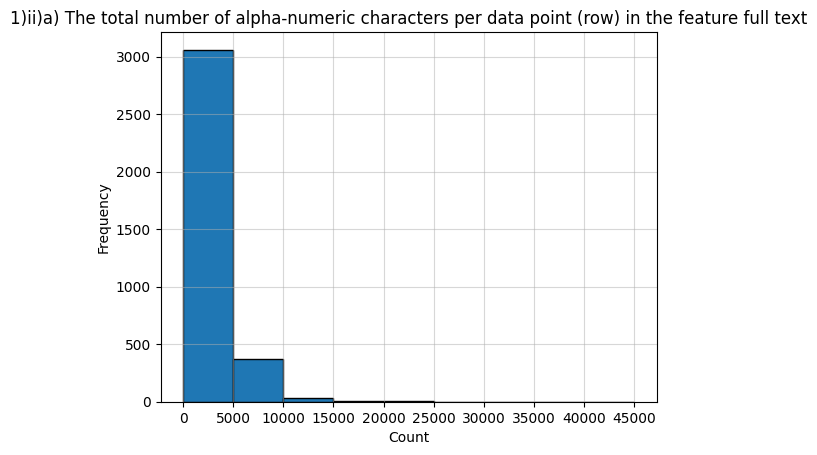

['3060', '369', '35', '8', '2', '0', '1', '0', '1']


In [3]:
alpha_numeric_characters_per_row = df['full_text'].apply(
    lambda row: sum(char.isalnum() for char in str(row))
).tolist()
counts, _, _ = plt.hist(
    alpha_numeric_characters_per_row,
    bins = np.linspace(0,45000,10,True),
    edgecolor = 'black'
)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.xticks(np.linspace(0,45000,10,True))
plt.title('1)ii)a) The total number of alpha-numeric characters per data point (row) in the feature full text')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

print([f"{count:.0f}" for count in counts])


### Ans (b):

Text(0, 0.5, 'Frequency')

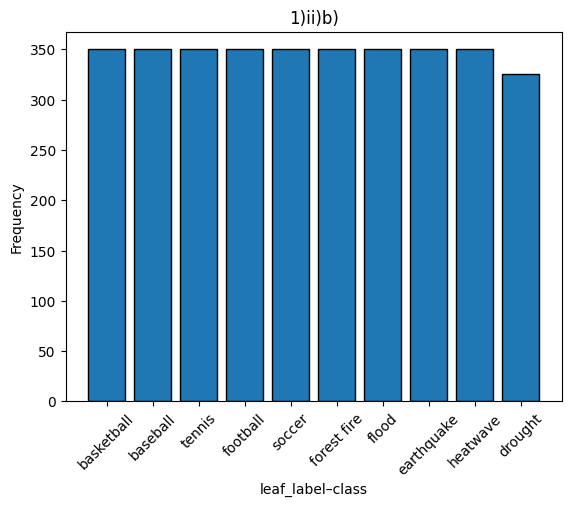

In [4]:
plt.bar(
    df['leaf_label'].value_counts().index.astype(str),
    df['leaf_label'].value_counts().values,
    edgecolor = 'black'
)
plt.title('1)ii)b)')
plt.xlabel('leaf_label–class')
plt.xticks(rotation=45)
plt.ylabel('Frequency')


### Ans (c):

Text(0, 0.5, 'Frequency')

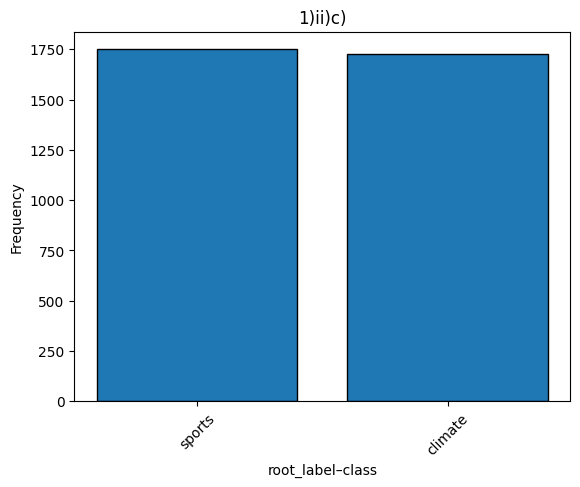

In [5]:
plt.bar(
    df['root_label'].value_counts().index.astype(str),
    df['root_label'].value_counts().values,
    edgecolor = 'black'
)
plt.title('1)ii)c)')
plt.xlabel('root_label–class')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

### iii) Provide qualitative interpretations of the histograms.

For plot (a), we can conclude that most (3060/3476*100 = 88.03%) of the data points have between 0 and 5000 alpha-numeric characters. For counts beyond 5000, there is approximately an exponential decrease in the frequency.

In plot (b), we are trying to ascertain the number of data points corresponding to each granular (or 'leaf'/low-level) label. It seems that the dataset is well-balanced between the 10 classes, which means that a model trained to classify a new data-point (as one of the 10 classes) should result in an unbiased multi-class classifier.

In plot (c), we are trying to ascertain the number of data points corresponding to each high-level (or 'root') label. Ofcourse, it follows from both the plot and our observation in plot (b), that our dataset is well-balanced between the 2 classes, which means that a model trained to classify a new data-point (as one of the 2 classes) should result in an unbiased binary classifier. 



# Question 2




In [6]:
np.random.seed(42)
random.seed(42)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[["full_text","root_label", "leaf_label"]], test_size=0.2, random_state = 42)

### Storing and loading dfs to ensure consistency for collaborators (they will ignore everything upto this markdown section proceed directly from read _csv below)

In [8]:
train.to_csv('../data/train_df.csv', index=False)
test.to_csv('../data/test_df.csv', index=False)

# Lorenzo and Arthur will begin loading the data from here

In [2]:
train = pd.read_csv('../data/train_df.csv')
test = pd.read_csv('../data/test_df.csv')

### Report the number of training and testing samples.

### Ans:

In [3]:
print(f'There are {train.shape[0]} training samples.')
print(f'There are {test.shape[0]} testing samples.')


There are 2780 training samples.
There are 696 testing samples.


# Question 3

### Text cleaning:

In [4]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

print(train.head())
print(test.head())

train['full_text'] = train['full_text'].apply(
    lambda row: clean(row)
)
test['full_text'] = test['full_text'].apply(
    lambda row: clean(row)
)
print(train.head())
print(test.head())

                                           full_text root_label  leaf_label
0  'While the four-day Aftershock's economic impa...    climate  earthquake
1  'CBS Essentials is created independently of th...     sports    football
2  'Moderate-to-severe drought will likely contin...    climate     drought
3  'Colleen Flood, the longtime co-owner of The F...    climate       flood
4  'WASHINGTON TRAFFIC MAY HAVE SAVED HIS LIFE. Y...     sports    baseball
                                           full_text root_label   leaf_label
0  'A small patch of snow on the ground in Douai,...    climate  forest fire
1  'Antonio Zago, of Brazil, puts on a jersey dur...     sports       soccer
2  'NEW YORK >> The Las Vegas Aces became the fir...     sports   basketball
3  'Christian Abraham/Hearst Connecticut Media\n\...    climate        flood
4  'The City of Watertown is currently under a wa...    climate      drought
                                           full_text root_label  leaf_label
0  'Wh

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from string import punctuation
from tqdm import tqdm
tqdm.pandas() 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download("stopwords")

lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer(stop_words = 'english', min_df = 3)
tfidf_transformer = TfidfTransformer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatizer_func(sentence): 
    lemmatized_sen = []
    lemma_list = [lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(sentence))]
    for lemma in lemma_list:
        if (not any(char in lemma for char in punctuation) and not any(char.isdigit() for char in lemma)):
            lemmatized_sen.append(lemma.lower())
    return ' '.join(lemmatized_sen)   

train['lemmatized'] = train['full_text'].progress_apply(lemmatizer_func)
test['lemmatized'] = test['full_text'].progress_apply(lemmatizer_func)

train_features = vectorizer.fit_transform(train['lemmatized'])
test_features = vectorizer.transform(test['lemmatized'])

train_features = tfidf_transformer.fit_transform(train_features)
test_features = tfidf_transformer.transform(test_features)

print(train_features.shape)
print(test_features.shape)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 696/696 [00:23<00:00, 29.42it/s]


(2780, 12780)
(696, 12780)


## 1. Pros and Cons of Lemmatization vs. Stemming

|                       | **Lemmatization**                                                                                                                                               | **Stemming**                                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Definition**        | Uses vocabulary and morphological analysis (including POS tags) to return the base form (lemma).<br>Examples: “better” → “good,” “mice” → “mouse.”             | Applies rule-based chops on word endings, often just truncating affixes.<br>Examples: “better” → “bett,” “mice” → “mic.” |
| **Accuracy**          | More accurate, preserves valid lemmas and actual language usage (requires computational resources).                                                              | Less accurate, can produce stems that aren’t real words or meaningful forms.                                            |
| **Complexity**        | Slower, more resource-intensive (involves POS tagging and morphological analysis).                                                                               | Faster, less resource-intensive.                                                                                            |
| **Impact on Vocabulary Size** | Can more precisely merge morphological variants into a single lemma, often reducing vocabulary size in a more controlled manner.                                                            | Also reduces vocabulary size, but less controlled. Can merge words incorrectly or generate multiple meaningless stems.   |

<br>

## 2. What is `min_df`? How Does Varying It Affect the TF-IDF Matrix?

### Definition of Document Frequency

Let:
- $ \mathcal{D} $ = the set of all documents, with $\lvert \mathcal{D} \rvert = N$.
- $t$ = a term in the vocabulary.

We define the **document frequency** of \(t\) as:

$$
\text{df}(t) \;=\; \bigl|\{\, d \in \mathcal{D} : t \in d \}\bigr|.
$$

In other words, $\text{df}(t)$ is the count of how many documents in $\mathcal{D}$ contain the term $t$.

### Applying `min_df`

**`min_df`** = the **minimum document frequency** threshold. 
 - If we choose $min\_df = 5$, then only terms $t$ with $\text{df}(t) \ge 5$ will be included in our vocabulary.
 - Formally, the **reduced vocabulary** $V_{min\_df}$ is:
   $$
   V_{min\_df} = \{\, t : \text{df}(t) \ge min\_df \}.
   $$
 - **Effect**: Increasing `min_df` removes more terms (especially rare ones), thus **reducing the number of columns** in the TF-IDF matrix. Decreasing `min_df` adds more terms, **increasing dimensionality**.





<br>

## 3. Should I Remove Stopwords, Punctuation, and Numbers Before or After Lemmatizing?

- **Stopwords**  
  Ideally, we want the lemmatizer to see all words in context (which can sometimes help with POS tagging), hence, we remove them **after** lemmatization to maintain fidelity.

- **Punctuation**  
  We should remove punctuation **after** lemmatization as this helps in the case of handling contractions such as "can't" or "won't". If we removed the punctuations before lemmatization, the lemmatizer would see words like "cant" or "wont" and wouldn't be able to lemmatize these words correctly.

- **Numbers**  
  It is best to remove them **after** lemmatization because numbers can signal plural forms or help disambiguate part-of-speech. For example, “He addresses 2 addresses” is a sentence where the word "addresses" can be both a verb and a plural noun. Therefore, removing numbers in such cases too soon can lead to ambiguous tagging.

<br>

## 4. Reporting TF-IDF Shapes

Finally, after transforming your text data into TF-IDF features:

- **Train matrix shape**:  
  $
    (\text{2780}, \;\text{12780})
  $
- **Test matrix shape**:  
  $
    (\text{696}, \;\text{12780})
  $

where $\text{12780} \approx k \times 10^3 \quad \text{with} \quad k \approx 12.78$.

# Question 4

### (i) Plot the explained variance ratio across multiple different k = [1,5,10,25,50,100,500,1000] for LSI and for the next few sections choose k = 25. What does the explained variance ratio plot look like? What does the plot’s concavity suggest?

100%|██████████| 8/8 [00:21<00:00,  2.74s/it]


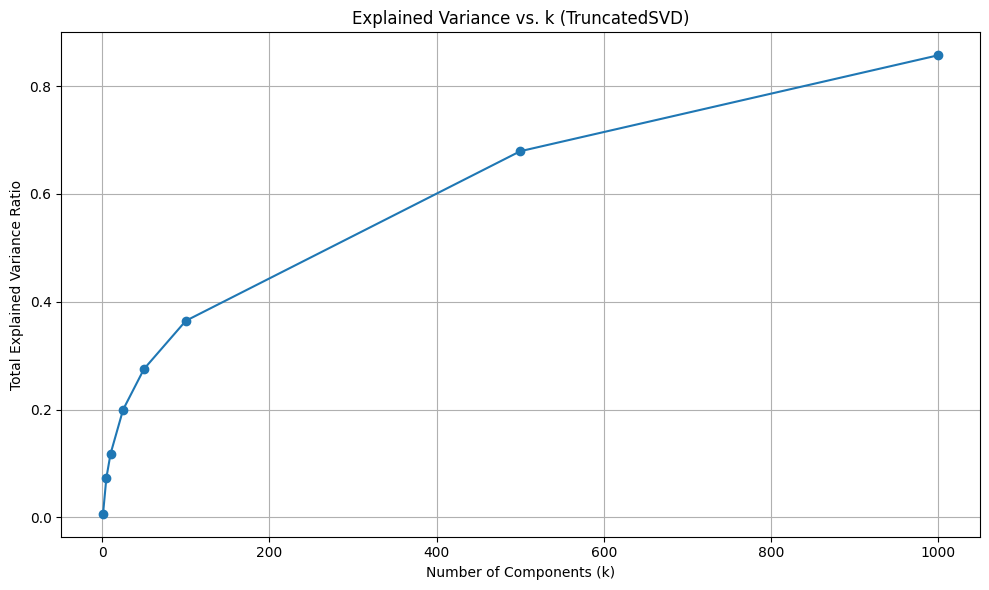

In [6]:
from sklearn.decomposition import TruncatedSVD

k_values = [1, 5, 10, 25, 50, 100, 500, 1000]
explained_variances = []
for k in tqdm(k_values):
    svd_k = TruncatedSVD(n_components=k, random_state=42)
    svd_k.fit(train_features)
    explained_variances.append(np.sum(svd_k.explained_variance_ratio_))

plt.figure(figsize=(10,6))
plt.plot(k_values, explained_variances, marker='o')
plt.title("Explained Variance vs. k (TruncatedSVD)")
plt.xlabel("Number of Components (k)")
plt.ylabel("Total Explained Variance Ratio")
plt.grid(True)
plt.tight_layout() 
plt.show()


## Explained Variance Ratio Plot

The plot of "explained variance ratio" vs. `k` **increases quickly** at lower `k` and **starts to flatten** as `k` grows. This **concavity** indicates **diminishing returns**: after a certain point, adding more dimensions yields only marginal increases in explained variance.



### (ii) With k = 25 found in the previous sections, calculate the reconstruction residual MSE error when using LSI and NMF– they both should use the same k = 25. Which one is larger, the $\|X - W H\|_F^2$ in NMF or the $\|X - U_k \Sigma_k V_k^T\|_F^2$ in LSI and why?

In [7]:
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.utils.extmath import randomized_svd

k = 25
svd_func = TruncatedSVD(n_components=k, random_state=42)
U_tr, S_tr, V_tr = randomized_svd(train_features, n_components=k, random_state=42)
train_LSI_recon = U_tr @ np.diag(S_tr) @ V_tr
train_data_LSI = svd_func.fit_transform(train_features)
LSI_train_error = np.sum(np.array(train_features - train_LSI_recon)**2)

U_te, S_te, V_te = randomized_svd(test_features, n_components=k, random_state=42)
test_LSI_recon = U_te @ np.diag(S_te) @ V_te
test_data_LSI = svd_func.transform(test_features)
LSI_test_error = np.sum(np.array(test_features - test_LSI_recon)**2)


nmf_25 = NMF(n_components=k, init='random', random_state=42)
W_tr = nmf_25.fit_transform(train_features)   
H = nmf_25.components_                        
train_NMF_recon = W_tr @ H
NMF_train_error = np.sum(np.array(train_features - train_NMF_recon)**2)

W_te = nmf_25.transform(test_features)       
test_NMF_recon = W_te @ H
NMF_test_error = np.sum(np.array(test_features - test_NMF_recon)**2)

print("=== LSI ===")
print(f"Train Error: {LSI_train_error:.4f}")
print(f"Test Error: {LSI_test_error:.4f}")

print("\n=== NMF ===")
print(f"Train Error: {NMF_train_error:.4f}")
print(f"Test Error: {NMF_test_error:.4f}")





=== LSI ===
Train Error: 2153.2136
Test Error: 528.8133

=== NMF ===
Train Error: 2172.0593
Test Error: 557.1169


### **Comparing Errors** (LSI vs. NMF)

- **LSI (Truncated SVD)**  
  1. **Optimal low-rank approximation**:  
     By design, SVD finds the best possible rank-$k$ representation of a matrix $X$ under the Frobenius norm. Mathematically, the truncated SVD solution minimizes  
     $$
     \|X - U_k \Sigma_k V_k^T\|_F^2,
     $$
     which guarantees that, among all rank-$k$ matrices, $U_k \Sigma_k V_k^T$ is the one that yields the **lowest reconstruction error** in the least-squares sense.
  2. **Negative/positive values**:  
     Because standard SVD imposes **no sign constraints**, the resulting components can include **negative and positive values**. This is typically **not** a problem if your goal is purely to reduce dimensionality and you don’t require interpretability of components.

- **NMF (Non-negative Matrix Factorization)**  
  1. **Non-negativity constraint**:  
     NMF factorizes $X$ into two non-negative matrices $W$ and $H$ so that  
     $$
     X \approx W \times H,
     $$
     with all entries in $W$ and $H$ $\geq 0$. The constraint that every entry must be non-negative is **highly restrictive**, which generally means:
     $$
     \|X - W H\|_F^2
     $$
     is often **larger** for a given rank $k$ than the unconstrained SVD’s error.
  2. **Interpretability benefit**:  
     Because the factors $W$ and $H$ are non-negative, it is easier to interpret them—particularly in topic modeling or part-based representations. For instance, in text analysis, each dimension can be viewed as a **topic** (column of $H$) composed of non-negative word weights, and each row of $W$ shows how strongly a document associates with each topic. This **interpretability** is often valuable enough to trade off some additional reconstruction error.

#### Summary
- **LSI** usually yields **lower** reconstruction error because it’s an **unconstrained** (optimal) rank-$k$ approximation.  
- **NMF** usually yields a **larger** reconstruction error for the same $k$ but can be far more **interpretable**, as it restricts the solution space to **non-negative** factors that align well with many real-world data interpretations (e.g., additive parts in images, topics in text). 


# Question 5

# Train two linear SVMs:– Train one SVM with γ = 2000 (hard margin), another with γ = 0.0005 (soft margin).– Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of both SVM classifiers on the testing set. Which one performs better? What about for γ = 100000?


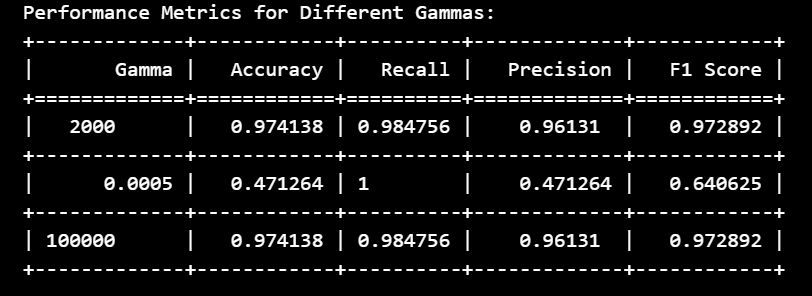


### As we can see from this table that is printed throught the code below, the best hard margin SVM has better performance for this task.

### For γ = 100000, the performance is indentical to that of a hard margin SVM


# What happens for the soft margin SVM? Why is the case? Analyze in terms of the confusion matrix.


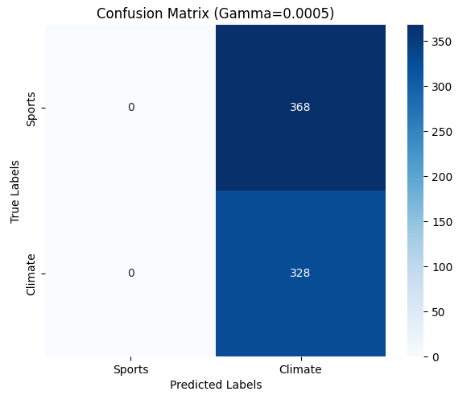


### In a soft-margin SVM, some misclassifications are intentionally permitted to widen the margin so that data points remain classifiable even when they are not perfectly separable. If γ is small, the hinge loss carries less weight, meaning errors are penalized less than when γ is large. As a result, a soft-margin classifier may correctly group every instance of a certain class C, but it can also mistakenly include samples from other classes under C. This yields higher recall (compared to a hard-margin SVM) but at the expense of some misclassifications. Hence, in our confusion matrix we see that while all samples of class 'climate' have been classified correctly, all samples of class 'sports' have been classified incorrectly.


# Does the ROC curve reflect the performance of the soft-margin SVM? Why?


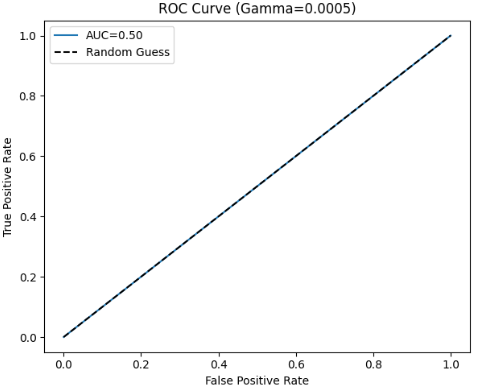


### Yes, the ROC curve reflects the performance of the soft-margin SVM. This is because complete misclassification of one class while correctly classifying all samples belonging to the other class is no better than random guessing as seen in the curve.


# Use cross-validation to choose γ (use average validation 3 accuracy to compare): Using a 5-fold cross-validation, find the best value of the parameter γ in the range {10^k| − 3 ≤ k ≤6, k ∈ Z}. Again, plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this best SVM.


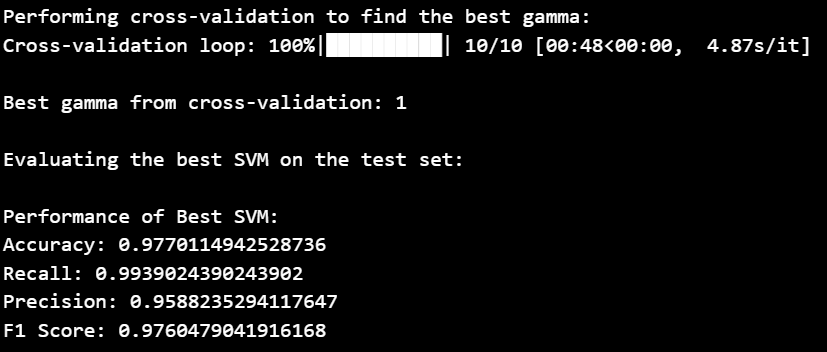


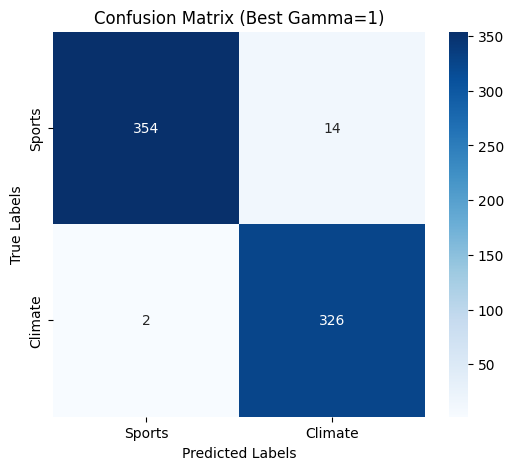


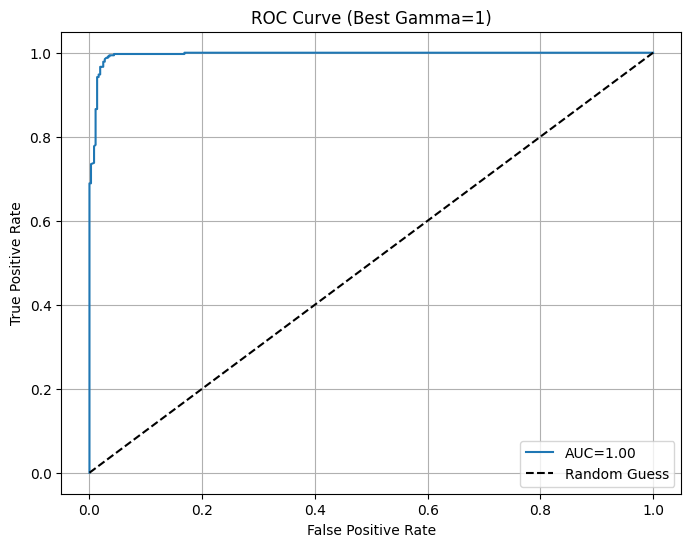

Training and evaluating SVMs for different gamma values:


Gamma loop: 100%|██████████| 3/3 [00:23<00:00,  7.91s/it]


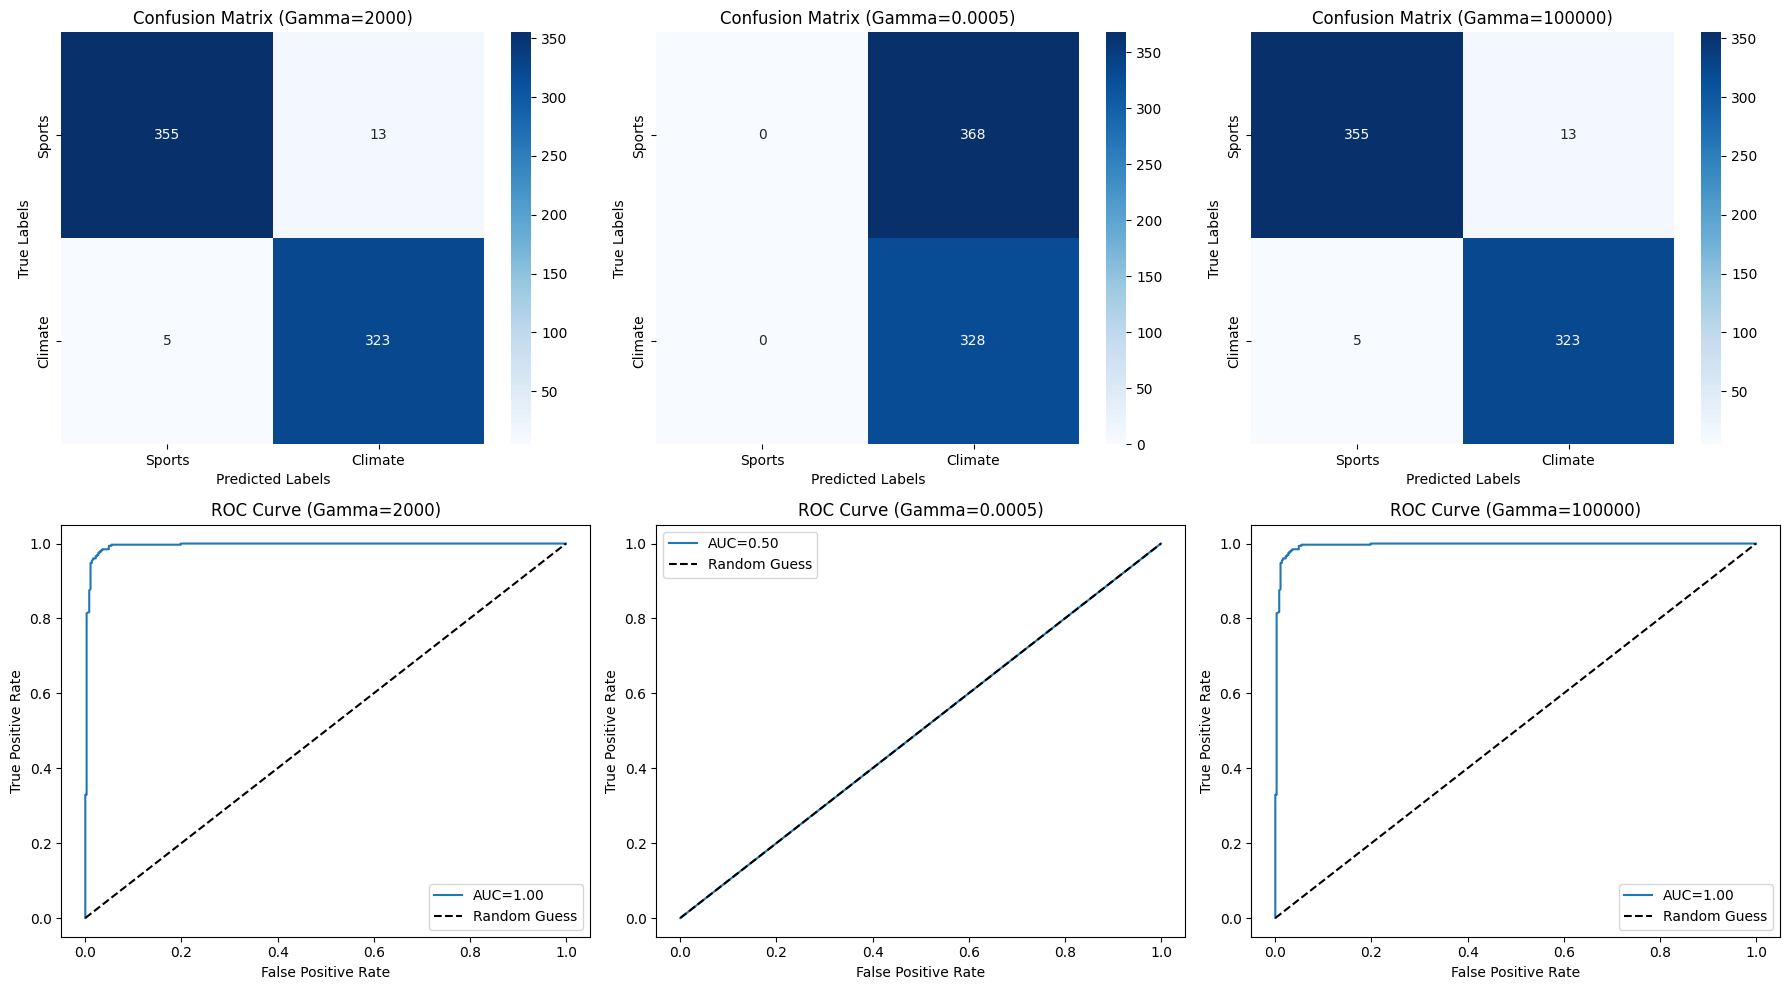


Performance Metrics for Different Gammas:
+-------------+------------+----------+-------------+------------+
|       Gamma |   Accuracy |   Recall |   Precision |   F1 Score |
+=============+============+==========+=============+============+
|   2000      |   0.974138 | 0.984756 |    0.96131  |   0.972892 |
+-------------+------------+----------+-------------+------------+
|      0.0005 |   0.471264 | 1        |    0.471264 |   0.640625 |
+-------------+------------+----------+-------------+------------+
| 100000      |   0.974138 | 0.984756 |    0.96131  |   0.972892 |
+-------------+------------+----------+-------------+------------+

Performing cross-validation to find the best gamma:


Cross-validation loop: 100%|██████████| 10/10 [00:45<00:00,  4.57s/it]



Best gamma from cross-validation: 1

Evaluating the best SVM on the test set:

Performance of Best SVM:
Accuracy: 0.9770114942528736
Recall: 0.9939024390243902
Precision: 0.9588235294117647
F1 Score: 0.9760479041916168


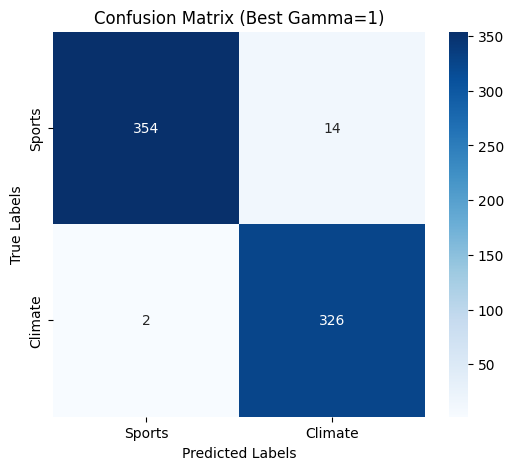

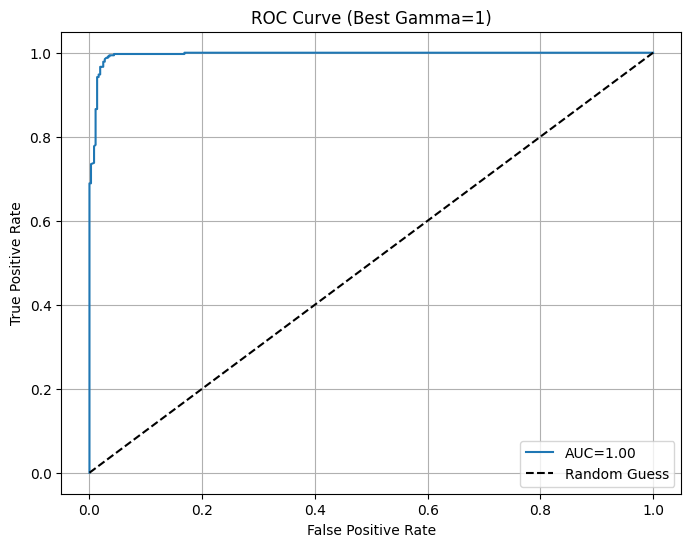

In [8]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_curve,
    auc,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)
from sklearn.model_selection import cross_val_score, KFold
from tabulate import tabulate

# Map labels ('sports' -> 0, 'climate' -> 1)
label_mapping = {'sports': 0, 'climate': 1}
train_labels = train['root_label'].map(label_mapping).values
test_labels = test['root_label'].map(label_mapping).values

# Apply TruncatedSVD for dimensionality reduction
svd_func = TruncatedSVD(n_components=1000, random_state=42)
train_data_LSI = svd_func.fit_transform(train_features)
test_data_LSI = svd_func.transform(test_features)

# Function to train and evaluate SVMs
def train_evaluate_svm(gamma, train_data, train_labels, test_data, test_labels):
    svm = SVC(kernel="linear", C=gamma, probability=True, random_state=42)
    svm.fit(train_data, train_labels)

    # Predictions
    predictions = svm.predict(test_data)
    probs = svm.predict_proba(test_data)[:, 1]

    # Metrics
    acc = accuracy_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)
    prec = precision_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    conf_matrix = confusion_matrix(test_labels, predictions)

    # ROC Curve
    fpr, tpr, _ = roc_curve(test_labels, probs)
    roc_auc = auc(fpr, tpr)

    return acc, rec, prec, f1, conf_matrix, fpr, tpr, roc_auc


# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, gamma, ax):
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Sports", "Climate"],
        yticklabels=["Sports", "Climate"],
        ax=ax,
    )
    ax.set_title(f"Confusion Matrix (Gamma={gamma})")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")


# Train and evaluate for the given gamma values
gammas = [2000, 0.0005, 100000]
results = {}

# Create subplots for confusion matrices and ROC curves
fig, axes = plt.subplots(2, len(gammas), figsize=(18, 10))

print("Training and evaluating SVMs for different gamma values:")
table_data = []
for idx, gamma in enumerate(tqdm(gammas, desc="Gamma loop")):
    acc, rec, prec, f1, conf_matrix, fpr, tpr, roc_auc = train_evaluate_svm(
        gamma, train_data_LSI, train_labels, test_data_LSI, test_labels
    )
    results[gamma] = {
        "accuracy": acc,
        "recall": rec,
        "precision": prec,
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr,
    }
    # Add metrics to the table
    table_data.append([gamma, acc, rec, prec, f1])

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, gamma, axes[0, idx])

    # Plot the ROC curve
    axes[1, idx].plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    axes[1, idx].plot([0, 1], [0, 1], "k--", label="Random Guess")
    axes[1, idx].set_title(f"ROC Curve (Gamma={gamma})")
    axes[1, idx].set_xlabel("False Positive Rate")
    axes[1, idx].set_ylabel("True Positive Rate")
    axes[1, idx].legend()

# Adjust layout and show confusion matrices and ROC curves
plt.tight_layout()
plt.show()

# Display metrics for each gamma in tabular format
print("\nPerformance Metrics for Different Gammas:")
print(tabulate(table_data, headers=["Gamma", "Accuracy", "Recall", "Precision", "F1 Score"], tablefmt="grid"))

# Cross-validation to choose the best gamma
cv_gammas = [10**k for k in range(-3, 7)]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
print("\nPerforming cross-validation to find the best gamma:")
for gamma in tqdm(cv_gammas, desc="Cross-validation loop"):
    svm = SVC(kernel="linear", C=gamma, random_state=42)
    scores = cross_val_score(svm, train_data_LSI, train_labels, cv=kf, scoring="accuracy")
    cv_results[gamma] = np.mean(scores)

# Best gamma
best_gamma = max(cv_results, key=cv_results.get)
print(f"\nBest gamma from cross-validation: {best_gamma}")

# Evaluate the best SVM on the test set
print("\nEvaluating the best SVM on the test set:")
acc, rec, prec, f1, conf_matrix, fpr, tpr, roc_auc = train_evaluate_svm(
    best_gamma, train_data_LSI, train_labels, test_data_LSI, test_labels
)

# Print metrics for the best gamma
print("\nPerformance of Best SVM:")
print(f"Accuracy: {acc}")
print(f"Recall: {rec}")
print(f"Precision: {prec}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix for the best gamma
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Sports", "Climate"],
    yticklabels=["Sports", "Climate"],
)
plt.title(f"Confusion Matrix (Best Gamma={best_gamma})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot the ROC curve for the best gamma
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title(f"ROC Curve (Best Gamma={best_gamma})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


# Question 6

# Train a logistic classifier without regularization; plot the ROC curve and report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of this classifier on the testing set.

### We set 'C' = inverse of regularization strength, to a very large value = 10000000000000 to approximate this. Here are the results:

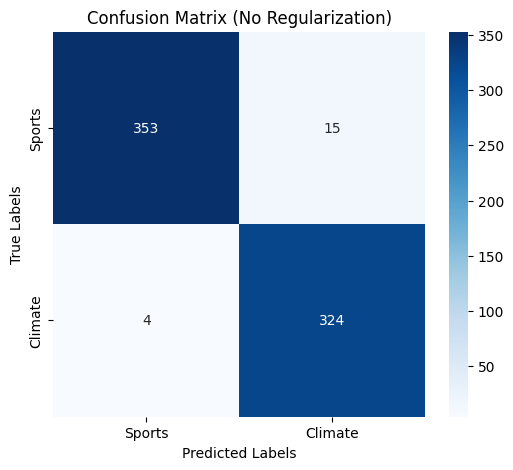


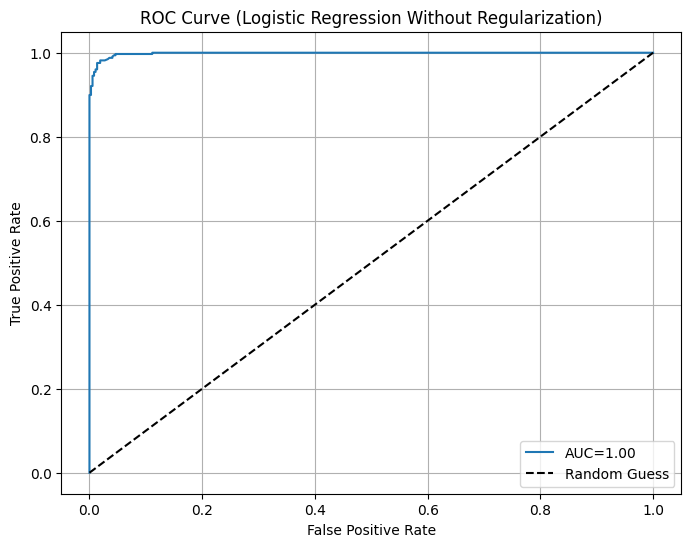


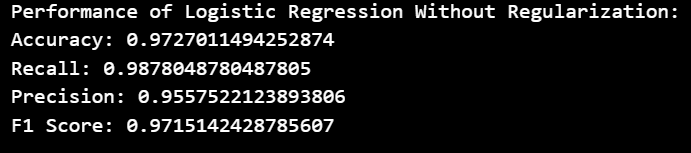


# Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal regularization strength in the range {10k|−5 ≤ k ≤ 5,k ∈ Z} for logistic regression with L1 regularization and logistic regression with L2 regularization, respectively.


### Best regularization strength for L1 Regularization: 0.0001; Best regularization strength for L2 Regularization: 0.01


# Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best parameters you found from the part above), using test data.


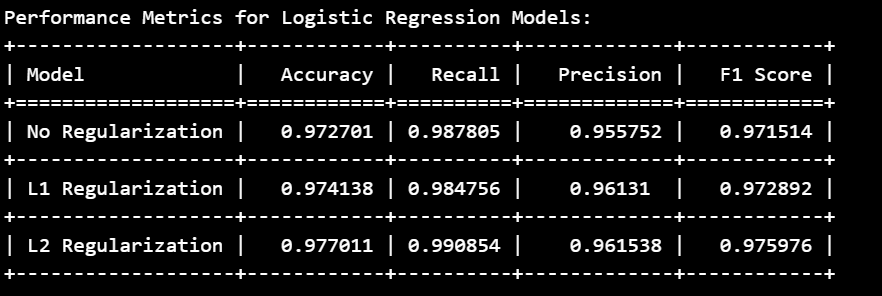


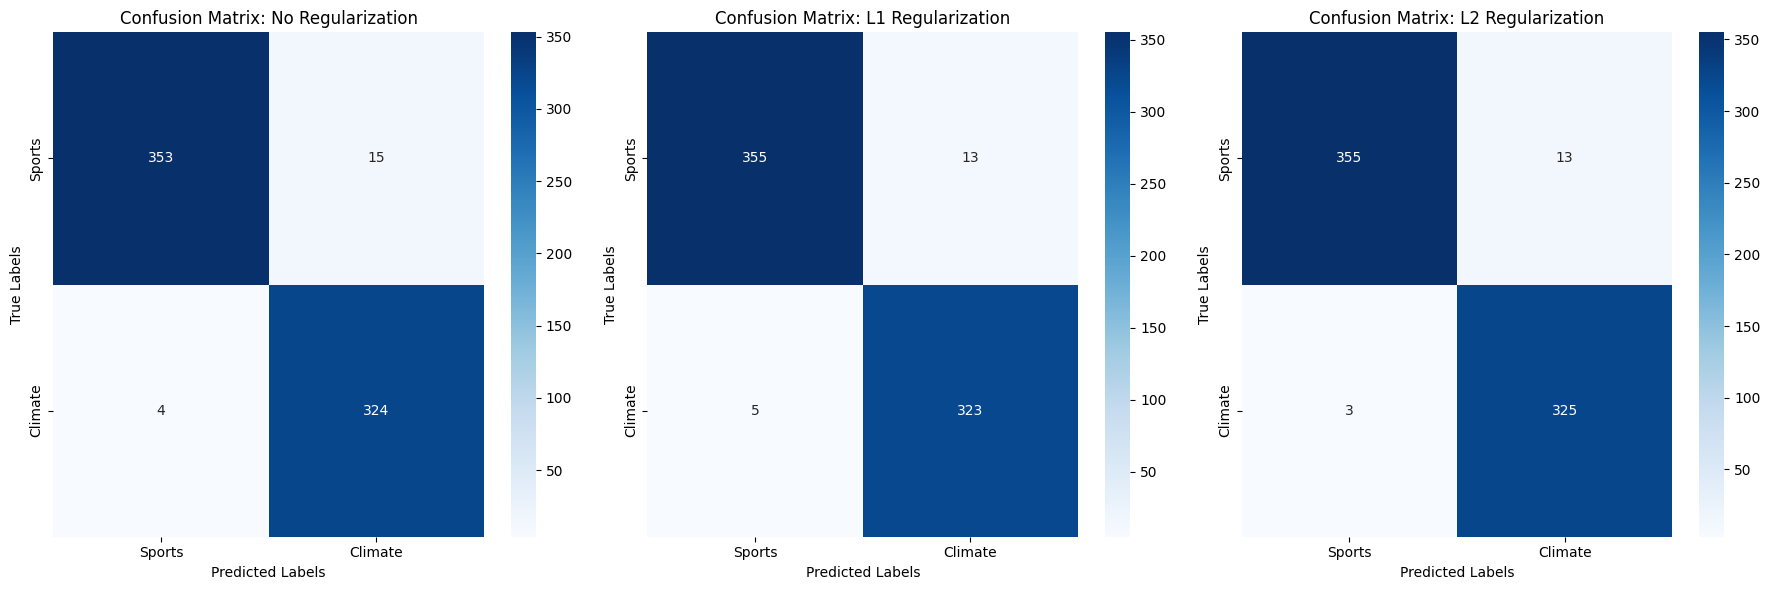


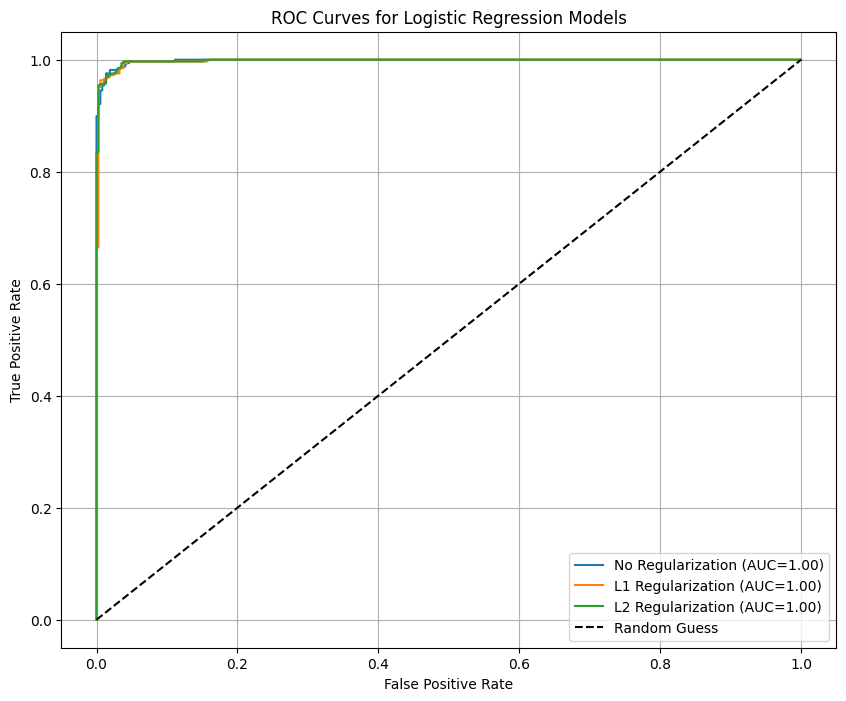



# How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?


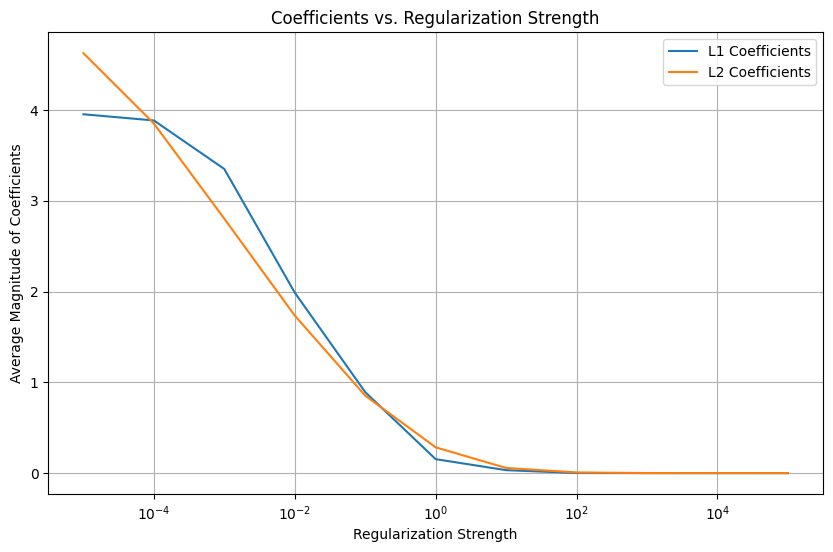


### As we can see, the average magnitude of the coefficients decreases as the regularization increases due to stricter penalisation.


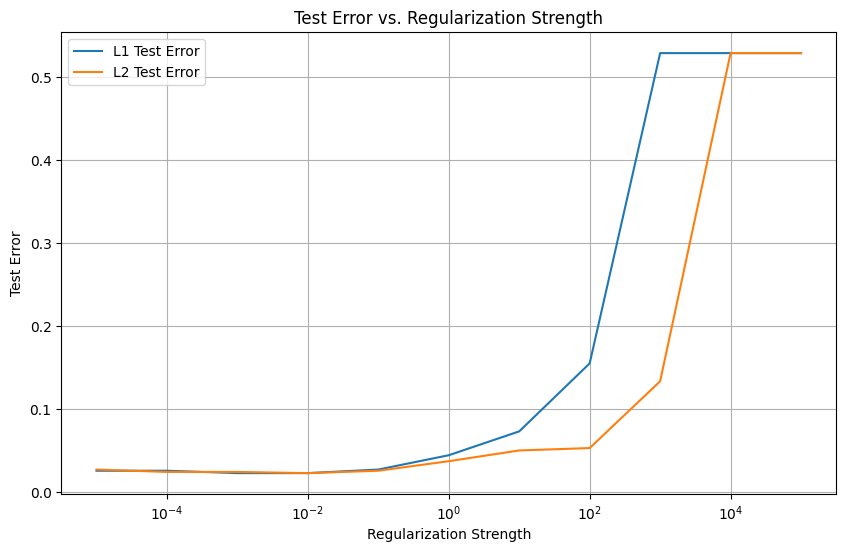


### As we can see, when the regularization strength is reasonable, the test error is pretty low, however, as the strength is increased beyond reasonable values, the model starts to underfit, and hence, generalisation decreases leading to an increase in the test error.

### Why each type of regularization might be chosen: L2 (ridge) is good for controlling overall coefficient magnitude (smooth shrinkage) and often works well when you expect all features to have some influence. L1 (lasso) is used when you want feature selection built in (coefficients can become exactly zero), which can improve interpretability and handle high-dimensional data where many features may be irrelevant.


# Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. What is the difference between their ways to find this boundary? Why do their performances differ? Is this difference statistically significant?


### Logistic Regression maximizes the likelihood of the observed labels, which amounts to minimizing the cross-entropy (logistic) loss. In other words, it explicitly models the probability of a data point belonging to one class vs. another. Linear SVM, on the other hand, maximizes the margin between the classes by minimizing the hinge loss subject to margin constraints. It focuses on finding the hyperplane that best separates the data with the largest gap (margin) between opposing classes, rather than modeling a probability distribution over classes. Whether the difference is statistically significant will depend on the properties of the dataset, however, we could test this by some hypothesis testing setup.

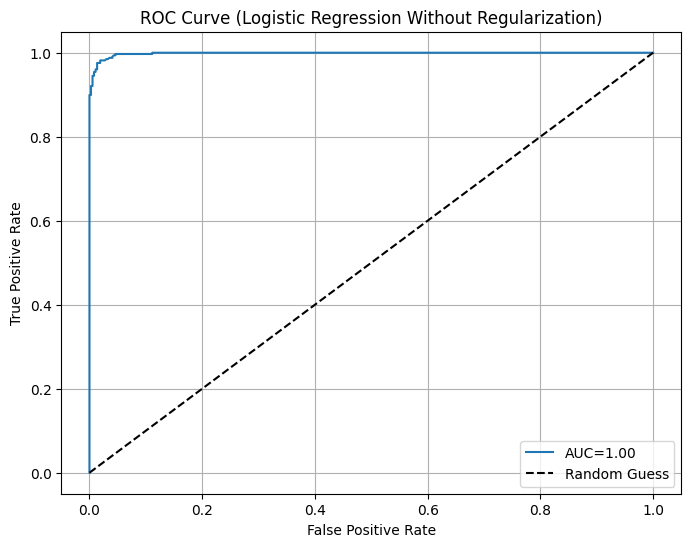

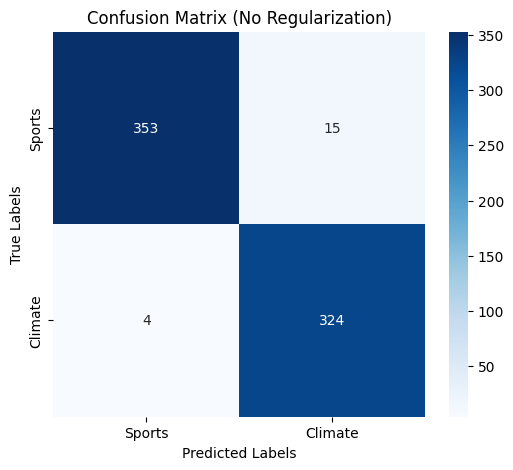


Performance of Logistic Regression Without Regularization:
Accuracy: 0.9727011494252874
Recall: 0.9878048780487805
Precision: 0.9557522123893806
F1 Score: 0.9715142428785607


In [9]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression without regularization
logistic_no_reg = LogisticRegression(max_iter=10000, random_state=42, C = 10000000000000)
logistic_no_reg.fit(train_data_LSI, train_labels)

# Predictions
predictions_no_reg = logistic_no_reg.predict(test_data_LSI)
probs_no_reg = logistic_no_reg.predict_proba(test_data_LSI)[:, 1]

# Metrics
acc_no_reg = accuracy_score(test_labels, predictions_no_reg)
rec_no_reg = recall_score(test_labels, predictions_no_reg)
prec_no_reg = precision_score(test_labels, predictions_no_reg)
f1_no_reg = f1_score(test_labels, predictions_no_reg)
conf_matrix_no_reg = confusion_matrix(test_labels, predictions_no_reg)

# Plot ROC curve
fpr_no_reg, tpr_no_reg, _ = roc_curve(test_labels, probs_no_reg)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_no_reg, tpr_no_reg, label=f"AUC={roc_auc_no_reg:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve (Logistic Regression Without Regularization)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_no_reg,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Sports", "Climate"],
    yticklabels=["Sports", "Climate"],
)
plt.title("Confusion Matrix (No Regularization)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print metrics
print("\nPerformance of Logistic Regression Without Regularization:")
print(f"Accuracy: {acc_no_reg}")
print(f"Recall: {rec_no_reg}")
print(f"Precision: {prec_no_reg}")
print(f"F1 Score: {f1_no_reg}")


In [11]:
cv_gammas = [10**k for k in range(-5, 6)]  # Regularization strengths (gamma values)
cv_results_l1 = {}
cv_results_l2 = {}

# L1 Regularization
for gamma in tqdm(cv_gammas, desc="L1 Regularization"):
    C = 1 / gamma  # Convert gamma to C
    logistic_l1 = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000, random_state=42)
    scores = cross_val_score(logistic_l1, train_data_LSI, train_labels, cv=5, scoring="accuracy")
    cv_results_l1[C] = np.mean(scores)

# L2 Regularization
for gamma in tqdm(cv_gammas, desc="L2 Regularization"):
    C = 1 / gamma  # Convert gamma to C
    logistic_l2 = LogisticRegression(penalty='l2', C=C, max_iter=10000, random_state=42)
    scores = cross_val_score(logistic_l2, train_data_LSI, train_labels, cv=5, scoring="accuracy")
    cv_results_l2[C] = np.mean(scores)

# Best C for L1 and L2
best_C_l1 = max(cv_results_l1, key=cv_results_l1.get)
best_C_l2 = max(cv_results_l2, key=cv_results_l2.get)

# Convert best C back to gamma
best_gamma_l1 = 1 / best_C_l1
best_gamma_l2 = 1 / best_C_l2

print(f"Best Gamma for L1 Regularization: {best_gamma_l1}")
print(f"Best Gamma for L2 Regularization: {best_gamma_l2}")


L2 Regularization: 100%|██████████| 11/11 [00:02<00:00,  4.68it/s]

Best Gamma for L1 Regularization: 0.0001
Best Gamma for L2 Regularization: 0.01



Performance Metrics for Logistic Regression Models:
+-------------------+------------+----------+-------------+------------+
| Model             |   Accuracy |   Recall |   Precision |   F1 Score |
+===================+============+==========+=============+============+
| No Regularization |   0.972701 | 0.987805 |    0.955752 |   0.971514 |
+-------------------+------------+----------+-------------+------------+
| L1 Regularization |   0.974138 | 0.984756 |    0.96131  |   0.972892 |
+-------------------+------------+----------+-------------+------------+
| L2 Regularization |   0.977011 | 0.990854 |    0.961538 |   0.975976 |
+-------------------+------------+----------+-------------+------------+


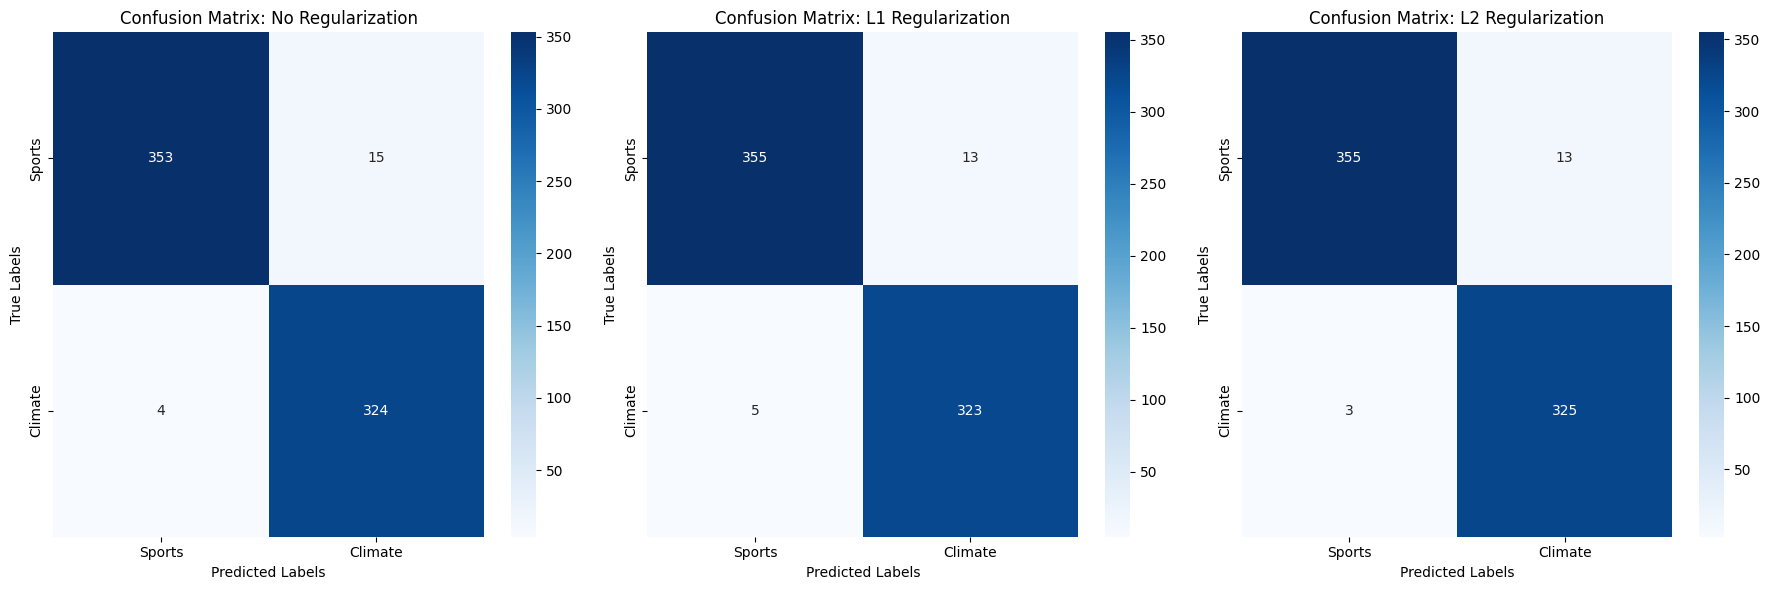

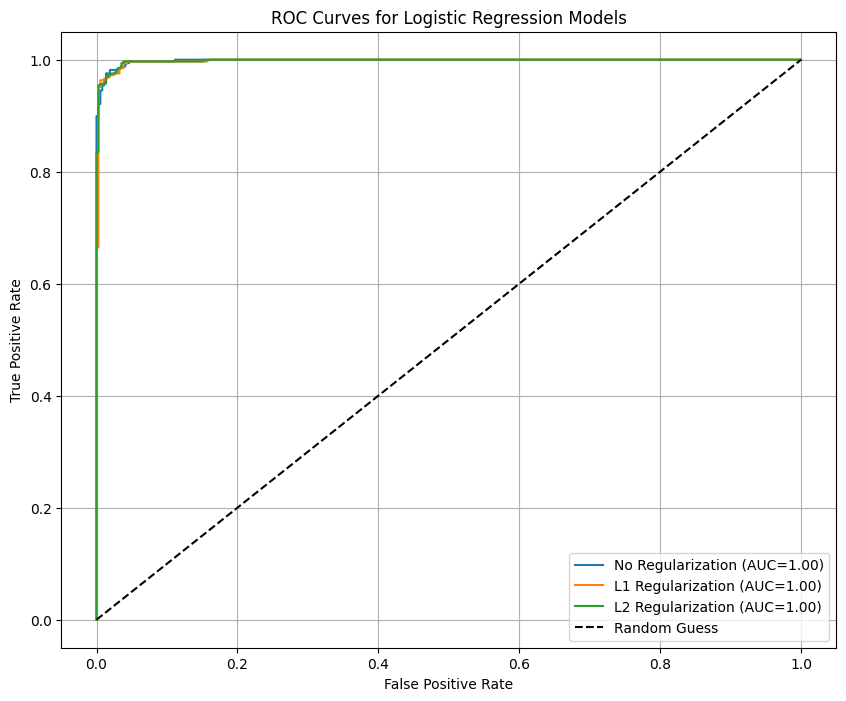

In [12]:
# Train and evaluate the models with the best regularization parameters
logistic_l1 = LogisticRegression(penalty='l1', solver='saga', C=best_C_l1, max_iter=10000, random_state=42)
logistic_l1.fit(train_data_LSI, train_labels)

logistic_l2 = LogisticRegression(penalty='l2', C=best_C_l2, max_iter=10000, random_state=42)
logistic_l2.fit(train_data_LSI, train_labels)

# Predictions and Metrics
models = {
    "No Regularization": logistic_no_reg,
    "L1 Regularization": logistic_l1,
    "L2 Regularization": logistic_l2,
}

performance_metrics = []
confusion_matrices = {}
roc_curves = {}

for model_name, model in models.items():
    predictions = model.predict(test_data_LSI)
    probs = model.predict_proba(test_data_LSI)[:, 1]
    acc = accuracy_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)
    prec = precision_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    conf_matrix = confusion_matrix(test_labels, predictions)
    fpr, tpr, _ = roc_curve(test_labels, probs)
    roc_auc = auc(fpr, tpr)

    # Save metrics
    performance_metrics.append([model_name, acc, rec, prec, f1])
    confusion_matrices[model_name] = conf_matrix
    roc_curves[model_name] = (fpr, tpr, roc_auc)

# Display metrics in tabular format
print("\nPerformance Metrics for Logistic Regression Models:")
print(tabulate(performance_metrics, headers=["Model", "Accuracy", "Recall", "Precision", "F1 Score"], tablefmt="grid"))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (model_name, conf_matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Sports", "Climate"],
        yticklabels=["Sports", "Climate"],
        ax=axes[idx],
    )
    axes[idx].set_title(f"Confusion Matrix: {model_name}")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")
plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curves for Logistic Regression Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


100%|██████████| 11/11 [03:59<00:00, 21.78s/it]


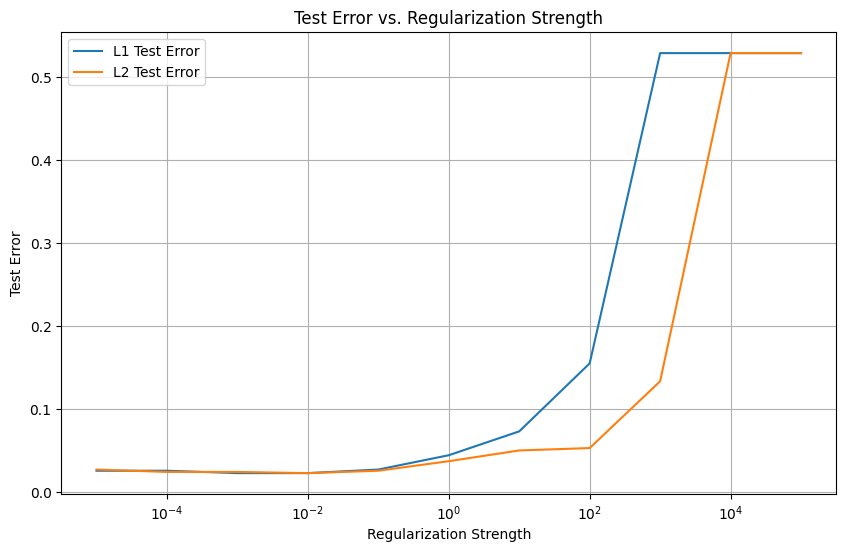

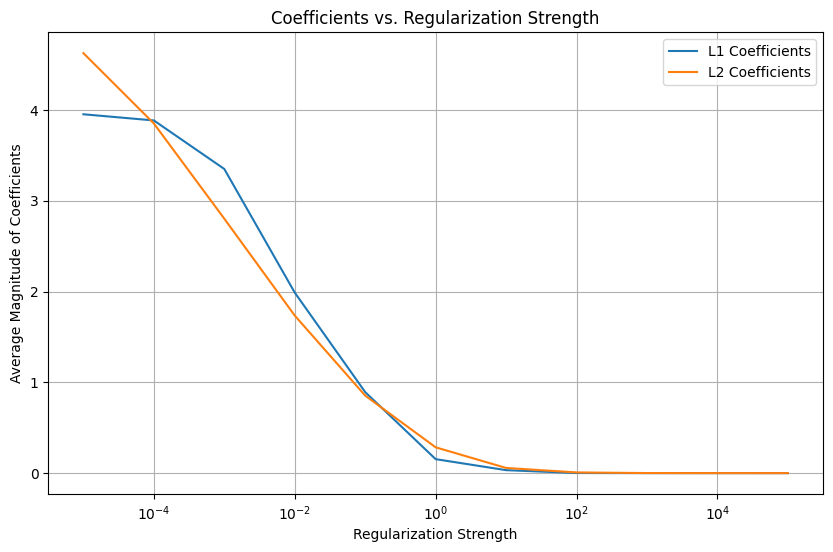

In [13]:
# Test error vs. C
test_errors_l1 = []
test_errors_l2 = []

coefficients_l1 = []
coefficients_l2 = []

for gamma_val in tqdm(cv_gammas):
    # L1
    C = 1/gamma_val
    model_l1 = LogisticRegression(penalty='l1', C=C, max_iter=10000, random_state=42)
    model_l1.fit(train_data_LSI, train_labels)
    predictions = model_l1.predict(test_data_LSI)
    test_errors_l1.append(1 - accuracy_score(test_labels, predictions))
    coefficients_l1.append(np.mean(np.abs(model_l1.coef_)))

    # L2
    model_l2 = LogisticRegression(penalty='l2', C=C, max_iter=10000, random_state=42)
    model_l2.fit(train_data_LSI, train_labels)
    predictions = model_l2.predict(test_data_LSI)
    test_errors_l2.append(1 - accuracy_score(test_labels, predictions))
    coefficients_l2.append(np.mean(np.abs(model_l2.coef_)))

# Plot test error vs. C
plt.figure(figsize=(10, 6))
plt.plot(cv_gammas, test_errors_l1, label="L1 Test Error")
plt.plot(cv_gammas, test_errors_l2, label="L2 Test Error")
plt.xscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("Test Error")
plt.title("Test Error vs. Regularization Strength")
plt.legend()
plt.grid()
plt.show()

# Plot coefficients vs. C
plt.figure(figsize=(10, 6))
plt.plot(cv_gammas, coefficients_l1, label="L1 Coefficients")
plt.plot(cv_gammas, coefficients_l2, label="L2 Coefficients")
plt.xscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("Average Magnitude of Coefficients")
plt.title("Coefficients vs. Regularization Strength")
plt.legend()
plt.grid()
plt.show()


# Question 7


Performance Metrics for Gaussian Naive Bayes Classifier:
+----------------------+------------+----------+-------------+------------+
| Model                |   Accuracy |   Recall |   Precision |   F1 Score |
+======================+============+==========+=============+============+
| Gaussian Naive Bayes |   0.599138 | 0.856707 |    0.547758 |   0.668252 |
+----------------------+------------+----------+-------------+------------+


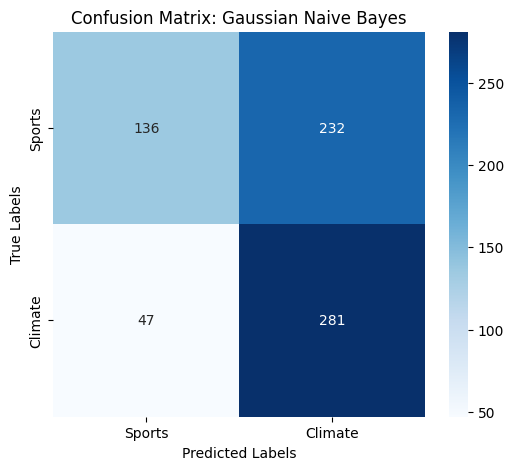

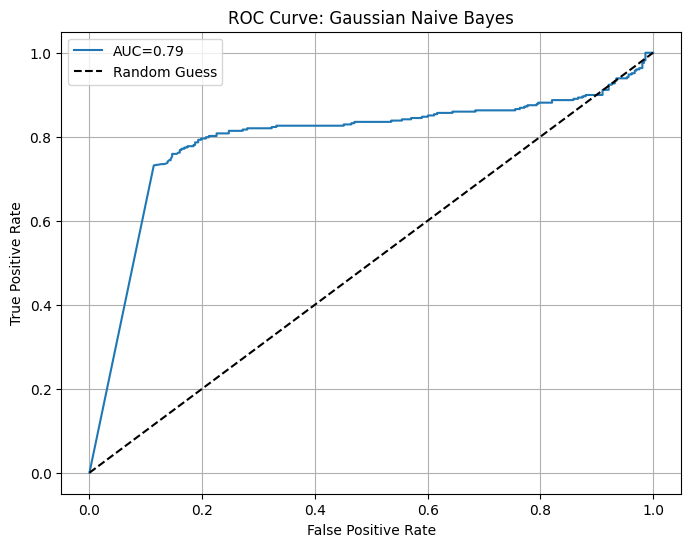

In [14]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(train_data_LSI, train_labels)

# Predictions and probabilities
predictions_gnb = gnb.predict(test_data_LSI)
probs_gnb = gnb.predict_proba(test_data_LSI)[:, 1]

# Metrics
acc_gnb = accuracy_score(test_labels, predictions_gnb)
rec_gnb = recall_score(test_labels, predictions_gnb)
prec_gnb = precision_score(test_labels, predictions_gnb)
f1_gnb = f1_score(test_labels, predictions_gnb)
conf_matrix_gnb = confusion_matrix(test_labels, predictions_gnb)

# ROC Curve
fpr_gnb, tpr_gnb, _ = roc_curve(test_labels, probs_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Print metrics
print("\nPerformance Metrics for Gaussian Naive Bayes Classifier:")
print(tabulate(
    [["Gaussian Naive Bayes", acc_gnb, rec_gnb, prec_gnb, f1_gnb]],
    headers=["Model", "Accuracy", "Recall", "Precision", "F1 Score"],
    tablefmt="grid"
))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_gnb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Sports", "Climate"],
    yticklabels=["Sports", "Climate"],
)
plt.title("Confusion Matrix: Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f"AUC={roc_auc_gnb:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve: Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


# Question 8

# (NOTE: THE OUTPUT OF THIS CODE CELL WILL BE CLEARED TO KEEP THE SCROLL-LENGTH OF THE FILE MANAGEABLE)
### 5 best estimators and their test accuracies:


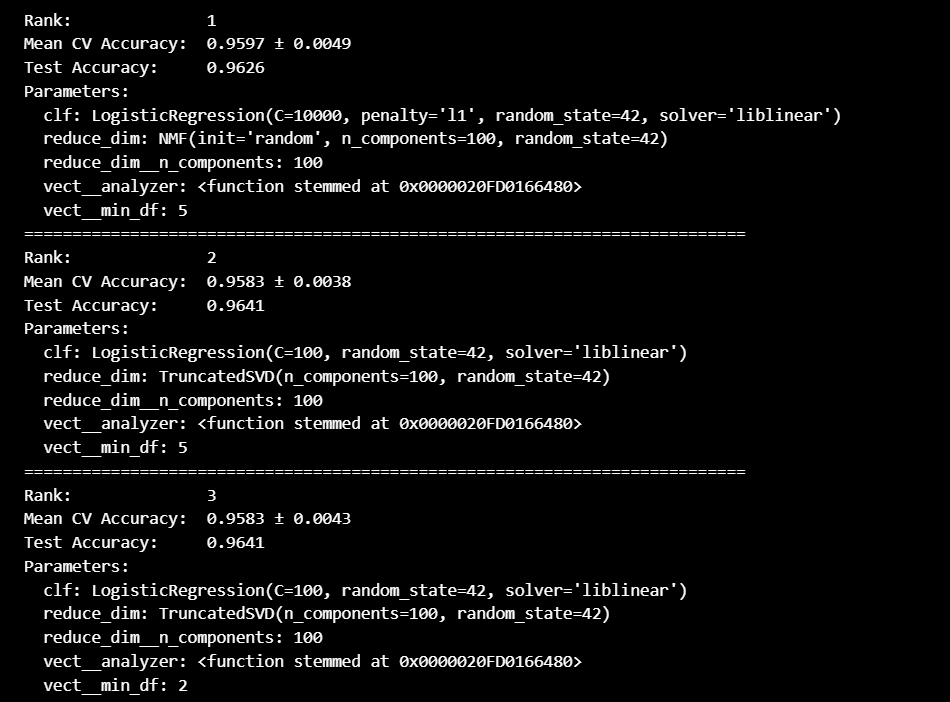


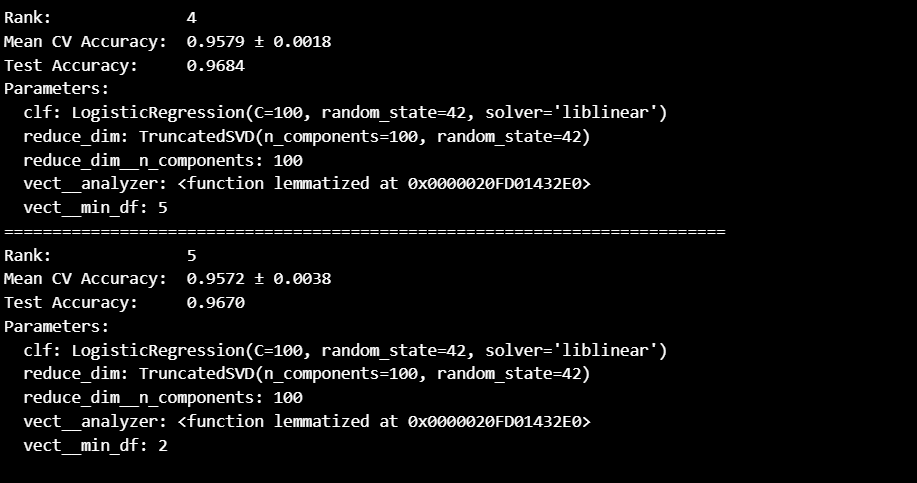


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation


from joblib import Memory
from tempfile import mkdtemp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from shutil import rmtree


cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatized(sentence):
    """
    Lemmatize, removing punctuation and digits.
    """
    lemmatized_sen = []
    tagged_words = pos_tag(word_tokenize(sentence))
    for word, tag in tagged_words:
        
        lemma = lemmatizer.lemmatize(word.lower(), pos=penn2morphy(tag))
        
        if (not any(char in punctuation for char in lemma) and 
            not any(char.isdigit() for char in lemma)):
            lemmatized_sen.append(lemma)
    return lemmatized_sen

def stemmed(sentence):
    """
    Stem, removing punctuation and digits.
    """
    stemmed_sen = []
    words = word_tokenize(sentence)
    for w in words:
        w_lower = w.lower()
        # Exclude words with punctuation or digits
        if (not any(char in punctuation for char in w_lower) and 
            not any(char.isdigit() for char in w_lower)):
            stemmed_sen.append(stemmer.stem(w_lower))
    return stemmed_sen




X_train = list(train['full_text'])
label_mapping = {'sports': 0, 'climate': 1}
train_labels = train['root_label'].map(label_mapping).values
test_labels = test['root_label'].map(label_mapping).values
y_train = train_labels.tolist()


pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),      # Will vary analyzer, min_df
    ('tfidf', TfidfTransformer()),    # TF-IDF 
    ('reduce_dim', None),   # Will vary with NMF as well
    ('clf', None)  # Will vary with LR L1/L2, GNB
],
memory=memory
)

param_grid = {
    # Feature Extraction
    'vect__min_df': [2, 5],
    'vect__analyzer': [lemmatized, stemmed],
    
    # Dimensionality Reduction: LSI == TruncatedSVD, or NMF
    'reduce_dim': [TruncatedSVD(random_state=42), NMF(init='random', random_state=42)],
    'reduce_dim__n_components': [5, 30, 100],
    
    # Classifier: 
    'clf': [
        SVC(kernel='linear', C=1, random_state=42),  # linear SVM,C=1
        LogisticRegression(penalty='l1', solver='liblinear', C=10000, random_state=42),  # best reg strength=0.0001 => C=1/0.0001=10000
        LogisticRegression(penalty='l2', solver='liblinear', C=100, random_state=42),    # best reg strength=0.01 => C=1/0.01=100
        GaussianNB()
    ]
}



grid = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    cv=5,                         # 5-fold cross-validation
    scoring='accuracy'  
)

print('Starting Grid Search...')
grid.fit(X_train, y_train)
rmtree(cachedir)


#print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)




In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from copy import deepcopy
from tqdm import tqdm


all_results_df = pd.DataFrame(grid.cv_results_)


all_results_df.sort_values(by="mean_test_score", ascending=False, inplace=True)
all_results_df.reset_index(drop=True, inplace=True)


top_5_df = all_results_df.head(5).copy()


X_test = list(test['full_text']) 
label_mapping = {'sports': 0, 'climate': 1}  # Example label mapping
y_test = test['root_label'].map(label_mapping).values.tolist()

# Create the same base pipeline structure used in grid
pipeline_base = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', None),
    ('clf', None)
])


top_5_performance = []

# Use tqdm to iterate over rows with a progress bar
for rank, (_, row) in enumerate(tqdm(top_5_df.iterrows(), total=len(top_5_df)), start=1):
    param_dict = row['params']

    # Create a fresh pipeline to avoid side effects
    local_pipeline = deepcopy(pipeline_base)
    
    # Set the best parameters
    local_pipeline.set_params(**param_dict)
    
    # Fit on the entire training set
    local_pipeline.fit(X_train, y_train)
    
    # Score on the test set
    test_score = local_pipeline.score(X_test, y_test)

    # Collect the results
    top_5_performance.append({
        'Rank': rank,
        'Mean CV Accuracy': row['mean_test_score'],
        'Std CV Accuracy': row['std_test_score'],
        'Test Accuracy': test_score,
        'Parameters': param_dict
    })


for entry in top_5_performance:
    print("=" * 75)
    print(f"Rank:              {entry['Rank']}")
    print(f"Mean CV Accuracy:  {entry['Mean CV Accuracy']:.4f} ± {entry['Std CV Accuracy']:.4f}")
    print(f"Test Accuracy:     {entry['Test Accuracy']:.4f}")
    print("Parameters:")
    for k, v in entry['Parameters'].items():
        print(f"  {k}: {v}")


  0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
 20%|██        | 1/5 [01:14<04:57, 74.34s/it]c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
 40%|████      | 2/5 [01:54<02:43, 54.43s/it]c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
 60%|██████    | 3/5 [02:35<01:36, 48.28s/it

Rank:              1
Mean CV Accuracy:  0.9597 ± 0.0049
Test Accuracy:     0.9626
Parameters:
  clf: LogisticRegression(C=10000, penalty='l1', random_state=42, solver='liblinear')
  reduce_dim: NMF(init='random', n_components=100, random_state=42)
  reduce_dim__n_components: 100
  vect__analyzer: <function stemmed at 0x0000020FD0166480>
  vect__min_df: 5
Rank:              2
Mean CV Accuracy:  0.9583 ± 0.0038
Test Accuracy:     0.9641
Parameters:
  clf: LogisticRegression(C=100, random_state=42, solver='liblinear')
  reduce_dim: TruncatedSVD(n_components=100, random_state=42)
  reduce_dim__n_components: 100
  vect__analyzer: <function stemmed at 0x0000020FD0166480>
  vect__min_df: 5
Rank:              3
Mean CV Accuracy:  0.9583 ± 0.0043
Test Accuracy:     0.9641
Parameters:
  clf: LogisticRegression(C=100, random_state=42, solver='liblinear')
  reduce_dim: TruncatedSVD(n_components=100, random_state=42)
  reduce_dim__n_components: 100
  vect__analyzer: <function stemmed at 0x0000020FD

In [24]:
table_data = []
for entry in top_5_performance:
    row = [
        entry['Rank'],
        f"{entry['Mean CV Accuracy']:.4f} ± {entry['Std CV Accuracy']:.4f}",
        f"{entry['Test Accuracy']:.4f}",
        ", ".join([f"{k}={v}" for k, v in entry['Parameters'].items()])
    ]
    table_data.append(row)

# 2) Define headers
headers = ["Rank", "CV Accuracy (mean ± std)", "Test Accuracy", "Parameters"]

# 3) Print the table in a clean, markdown-like format:
print(tabulate(table_data, headers=headers, tablefmt="github"))

|   Rank | CV Accuracy (mean ± std)   |   Test Accuracy | Parameters                                                                                                                                                                                                                                                  |
|--------|----------------------------|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|      1 | 0.9597 ± 0.0049            |          0.9626 | clf=LogisticRegression(C=10000, penalty='l1', random_state=42, solver='liblinear'), reduce_dim=NMF(init='random', n_components=100, random_state=42), reduce_dim__n_components=100, vect__analyzer=<function stemmed at 0x0000020FD0166480>, vect__min_df=5 |
|      2 | 0.9583 ± 0.0038            |          0.9641 | clf=Lo

# Question 9

### We will use this cell for evaluating classification models by calculating metrics and visualizing performance through confusion matrix heatmaps

In [6]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score


map_row_to_class = {
   0: "basketball", 1: "baseball", 2: "tennis",
   3: "football", 4: "soccer", 5: "forest fire",
   6: "flood", 7: "earthquake", 8: "drought", 9: "heatwave"
}


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['leaf_label'])
y_test = label_encoder.transform(test['leaf_label'])


def print_metrics(y_true, y_pred, model_name):
   acc = accuracy_score(y_true, y_pred)
   recall = recall_score(y_true, y_pred, average='weighted')
   precision = precision_score(y_true, y_pred, average='weighted')
   f1 = f1_score(y_true, y_pred, average='weighted')
   print(f"{model_name} - Accuracy: {acc:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

def plot_confusion_matrix(cm, model_name, class_labels):
   plt.figure(figsize=(10, 8))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
   plt.title(f"Confusion Matrix for {model_name}")
   plt.xlabel("Predicted Labels")
   plt.ylabel("True Labels")
   plt.show()

Naive Bayes - Accuracy: 0.7313, Recall: 0.7313, Precision: 0.7373, F1 Score: 0.7322


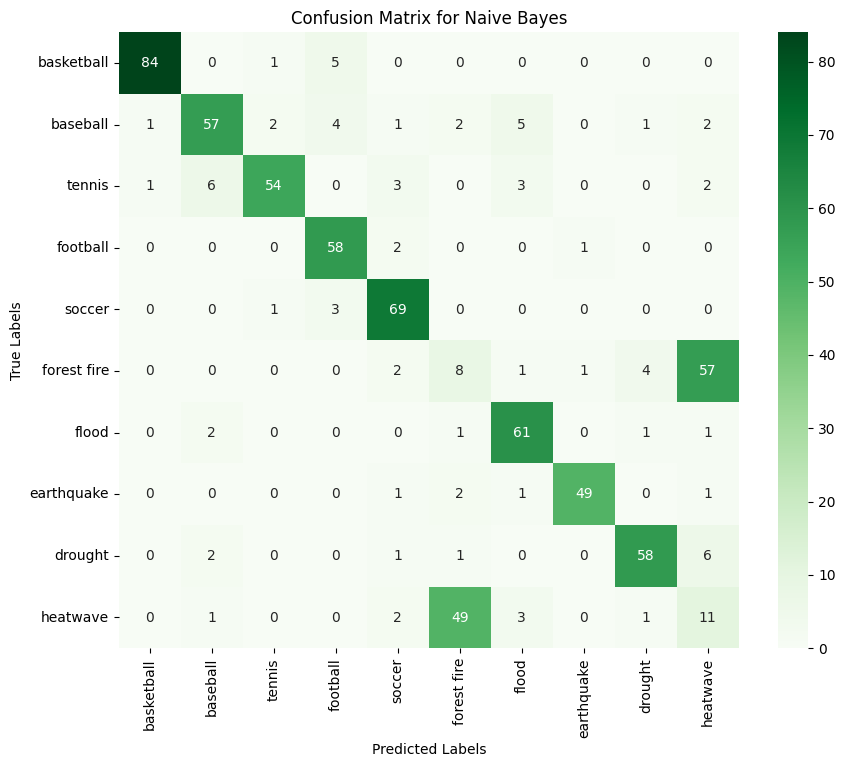

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

train_tfidf = train_features
test_tfidf = test_features

# training naive bayes
nb_model = MultinomialNB()
nb_model.fit(train_tfidf, y_train)


nb_predictions = nb_model.predict(test_tfidf)


# making confusion matrix
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)


# reorder confusion matrix to match map_row_to_class
class_order = [label_encoder.transform([map_row_to_class[i]])[0] for i in range(10)]
conf_matrix_nb_reordered = conf_matrix_nb[np.ix_(class_order, class_order)]


print_metrics(y_test, nb_predictions, "Naive Bayes")
plot_confusion_matrix(conf_matrix_nb_reordered, "Naive Bayes", list(map_row_to_class.values()))

SVM One-vs-One - Accuracy: 0.7557, Recall: 0.7557, Precision: 0.7766, F1 Score: 0.7654


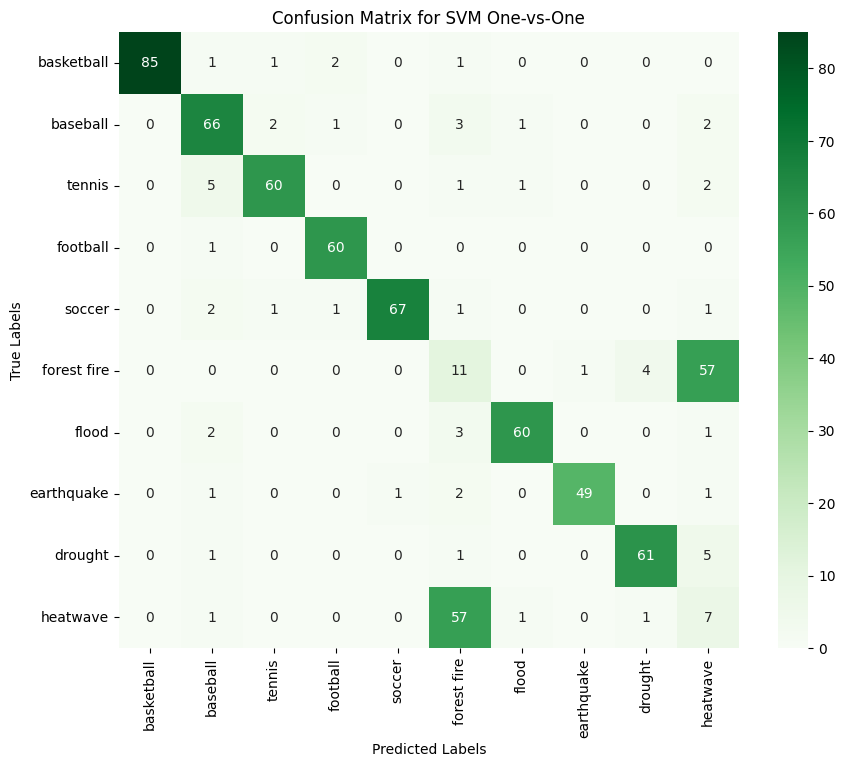

In [8]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC


# SVM One-vs-One Classifier
ovo_svm = OneVsOneClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))
ovo_svm.fit(train_tfidf, y_train)


ovo_predictions = ovo_svm.predict(test_tfidf)


conf_matrix_ovo = confusion_matrix(y_test, ovo_predictions)


class_order = [label_encoder.transform([map_row_to_class[i]])[0] for i in range(10)]
conf_matrix_ovo_reordered = conf_matrix_ovo[np.ix_(class_order, class_order)]


print_metrics(y_test, ovo_predictions, "SVM One-vs-One")
plot_confusion_matrix(conf_matrix_ovo_reordered, "SVM One-vs-One", list(map_row_to_class.values()))

SVM One-vs-Rest - Accuracy: 0.7730, Recall: 0.7730, Precision: 0.7865, F1 Score: 0.7793


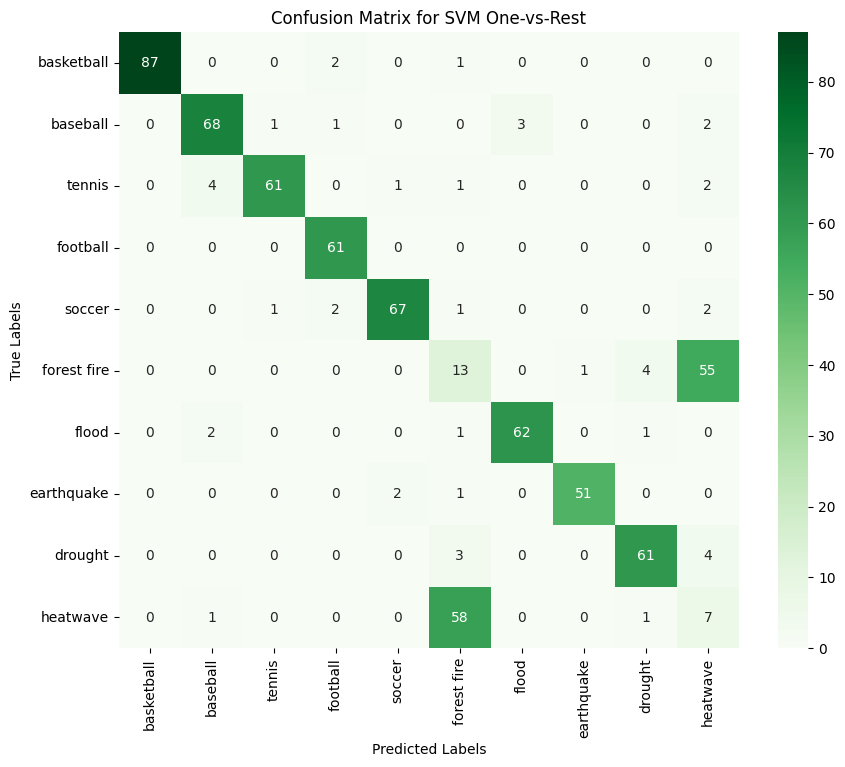

In [9]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


# Train SVM One-vs-Rest Classifier
ovr_svm = OneVsRestClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))
ovr_svm.fit(train_tfidf, y_train)


ovr_predictions = ovr_svm.predict(test_tfidf)


conf_matrix_ovr = confusion_matrix(y_test, ovr_predictions)


class_order = [label_encoder.transform([map_row_to_class[i]])[0] for i in range(10)]
conf_matrix_ovr_reordered = conf_matrix_ovr[np.ix_(class_order, class_order)]


print_metrics(y_test, ovr_predictions, "SVM One-vs-Rest")
plot_confusion_matrix(conf_matrix_ovr_reordered, "SVM One-vs-Rest", list(map_row_to_class.values()))

# How did you resolve the class imbalance issue in the One VS the rest model?





### We deal with the class imbalance issue by using the parameter **class_weight='balanced'** in the SVM. Doing so adjusts the weights of each class automatically based on their frequency, giving more important to minority classes, which ensures the model is not biased towards the majority class and learns to classify all classes more effectively.

# Do you observe any structure in the confusion matrix? Are there distinct visible blocks on the major diagonal? What does this mean?



### For the most part are distinct visible blocks along the confusion matrix's major diagonal of the confusion matrix, which indicates that the classifier is effectively distinguishing between the different classes and has a relatively high accuracy overall. However, the two noticeable off-diagonal blocks between heatwave and forest fire show that there are frequent misclassifications between tese two classes. There may be overlapping features or similarities in the data that causes the classifier to differentiate between them.



# Based on your observation from the previous part, suggest a subset of labels that should be merged into a new larger label and recompute the accuracy and plot the confusion matrix.



### We will merge **forest fire** and **heatwave** into a larger label called **fire hazard**.

Naive Bayes (Merged) - Accuracy: 0.7830, Recall: 0.7830, Precision: 0.8481, F1 Score: 0.7881


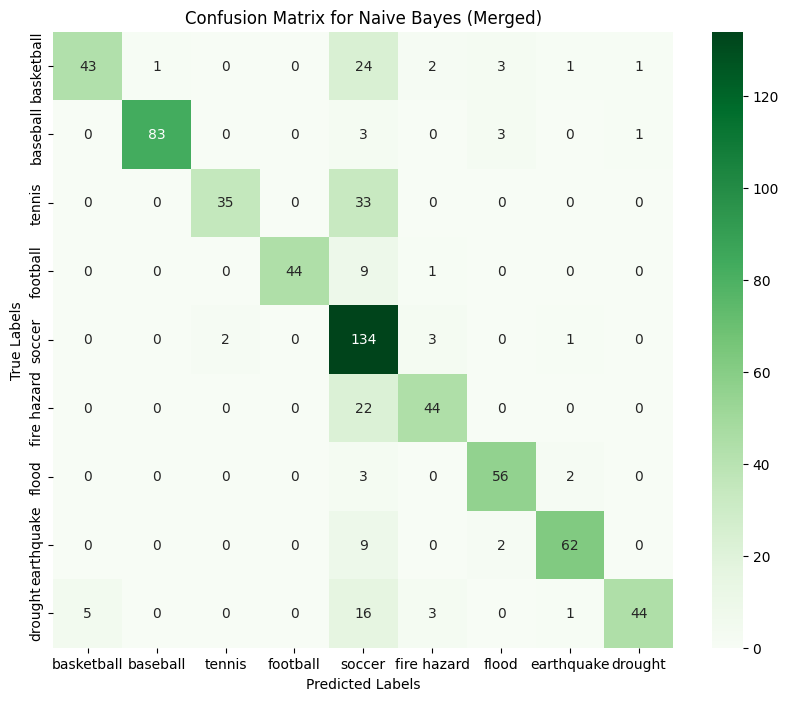

In [10]:
map_row_to_class_merged = {
   0: "basketball", 1: "baseball", 2: "tennis", 3: "football", 4: "soccer",
   5: "fire hazard", 6: "flood", 7: "earthquake", 8: "drought"
}

# copying original datasets to prevent it messing up previous code
train_merged = train.copy()
test_merged = test.copy()

# replace "forest fire" and "heatwave" with "fire hazard" in the copies
merge = {'forest fire': 'fire hazard', 'heatwave': 'fire hazard'}
train_merged['leaf_label'] = train_merged['leaf_label'].replace(merge)
test_merged['leaf_label'] = test_merged['leaf_label'].replace(merge)

# refit the label encoder with the updated labels
label_encoder = LabelEncoder()
y_train_merged = label_encoder.fit_transform(train_merged['leaf_label'])
y_test_merged = label_encoder.transform(test_merged['leaf_label'])

# retraining with new merge labels
nb_model = MultinomialNB()
nb_model.fit(train_tfidf, y_train_merged)
nb_predictions_merged = nb_model.predict(test_tfidf)
conf_matrix_nb_merged = confusion_matrix(y_test_merged, nb_predictions_merged)

class_order_merged = list(range(len(label_encoder.classes_)))
conf_matrix_nb_reordered_merged = conf_matrix_nb_merged[np.ix_(class_order_merged, class_order_merged)]
merged_labels = list(map_row_to_class_merged.values())

# Print metrics and plot confusion matrix
print_metrics(y_test_merged, nb_predictions_merged, "Naive Bayes (Merged)")
plot_confusion_matrix(conf_matrix_nb_reordered_merged, "Naive Bayes (Merged)", merged_labels)

In [11]:
# SVM One-vs-One Classifier with Merged Labels
ovo_svm_merged = OneVsOneClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))
ovo_svm_merged.fit(train_tfidf, y_train_merged)  

# Now using merged labels for creating confusion matrix
ovo_predictions_merged = ovo_svm_merged.predict(test_tfidf)
conf_matrix_ovo_merged = confusion_matrix(y_test_merged, ovo_predictions_merged)

class_order_merged = list(range(len(label_encoder.classes_)))
conf_matrix_ovo_reordered_merged = conf_matrix_ovo_merged[np.ix_(class_order_merged, class_order_merged)]

merged_labels = list(map_row_to_class_merged.values())

In [12]:
# Train SVM One-vs-Rest Classifier for Merged Labels
ovr_svm_merged = OneVsRestClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))

# using merged labels for training and creating confusion matrix
ovr_svm_merged.fit(train_tfidf, y_train_merged) 

ovr_predictions_merged = ovr_svm_merged.predict(test_tfidf)

conf_matrix_ovr_merged = confusion_matrix(y_test_merged, ovr_predictions_merged)

# reordering the merged labels for confusion matrix
class_order_merged = list(range(len(label_encoder.classes_))) 
conf_matrix_ovr_reordered_merged = conf_matrix_ovr_merged[np.ix_(class_order_merged, class_order_merged)]

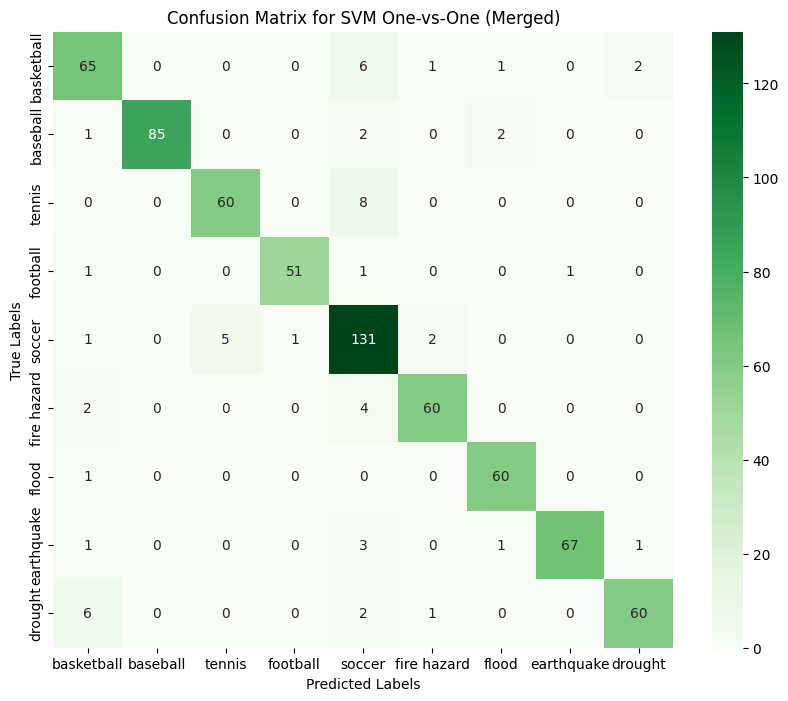

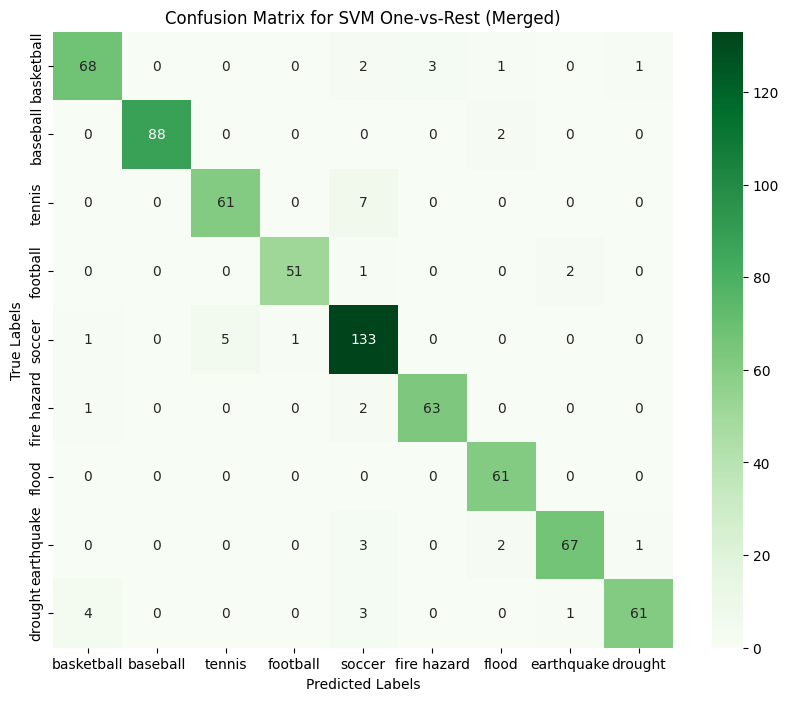

SVM One-vs-One (Merged) - Accuracy: 0.9181, Recall: 0.9181, Precision: 0.9221, F1 Score: 0.9189
SVM One-vs-Rest (Merged) - Accuracy: 0.9382, Recall: 0.9382, Precision: 0.9398, F1 Score: 0.9383


In [13]:
# plot both confusion matrices
plot_confusion_matrix(conf_matrix_ovo_reordered_merged, "SVM One-vs-One (Merged)", merged_labels)

merged_labels = list(map_row_to_class_merged.values())
plot_confusion_matrix(conf_matrix_ovr_reordered_merged, "SVM One-vs-Rest (Merged)", merged_labels)

# print metrics for both SVM One-vs-One and One-vs-Rest
print_metrics(y_test_merged, ovo_predictions_merged, "SVM One-vs-One (Merged)")
print_metrics(y_test_merged, ovr_predictions_merged, "SVM One-vs-Rest (Merged)")

# How did the accuracy change in One VS One and One VS the rest?




### One VS One saw a 16.24% improvement while One VS Rest saw a 16.52% improvement.

# Provide a resolution for the class imbalance and recompute the accuracy and plot the confusion matrix in One VS One and One VS the rest.

In [14]:
from imblearn.over_sampling import SMOTE

# resample the merged training dataset to balance classes
smote = SMOTE(random_state=42)
X_train_merged_balanced, y_train_merged_balanced = smote.fit_resample(train_tfidf, y_train_merged)

In [15]:
# Train the One-vs-One classifier with balanced merged data
ovo_svm_balanced = OneVsOneClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))
ovo_svm_balanced.fit(X_train_merged_balanced, y_train_merged_balanced)

ovo_predictions_balanced = ovo_svm_balanced.predict(test_tfidf)
conf_matrix_ovo_balanced = confusion_matrix(y_test_merged, ovo_predictions_balanced)

class_order_merged = list(range(len(label_encoder.classes_)))
conf_matrix_ovo_reordered_balanced = conf_matrix_ovo_balanced[np.ix_(class_order_merged, class_order_merged)]

In [16]:
ovr_svm_balanced = OneVsRestClassifier(SVC(kernel='linear', class_weight='balanced', probability=True))
ovr_svm_balanced.fit(X_train_merged_balanced, y_train_merged_balanced)

ovr_predictions_balanced = ovr_svm_balanced.predict(test_tfidf)
conf_matrix_ovr_balanced = confusion_matrix(y_test_merged, ovr_predictions_balanced)

class_order_merged = list(range(len(label_encoder.classes_)))
conf_matrix_ovr_reordered_balanced = conf_matrix_ovr_balanced[np.ix_(class_order_merged, class_order_merged)]

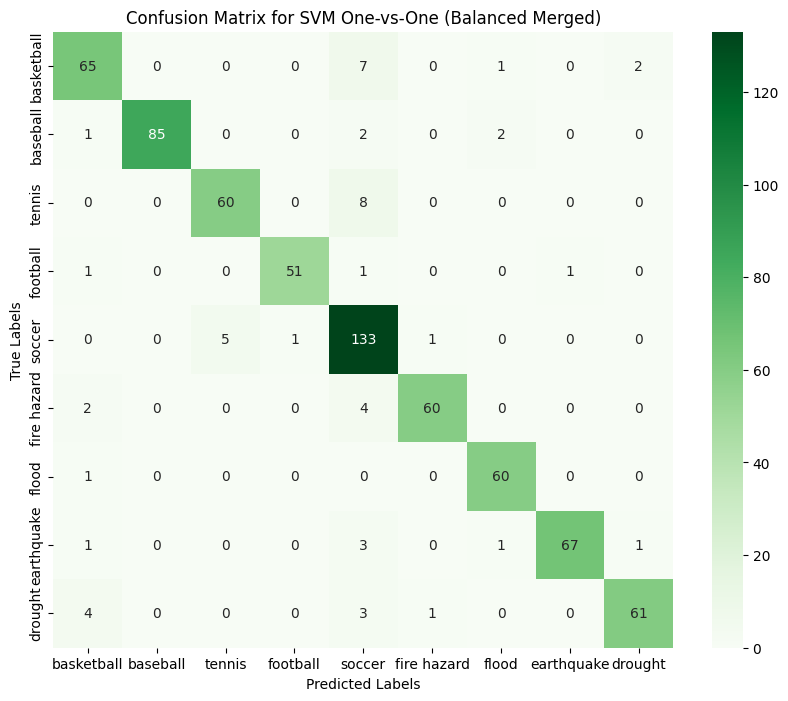

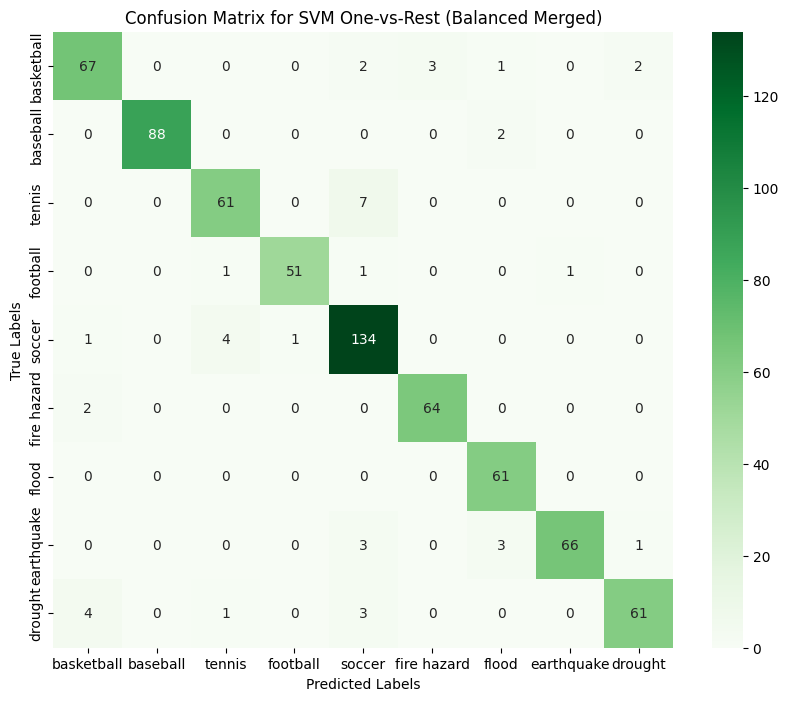

SVM One-vs-One (Balanced Merged) - Accuracy: 0.9224, Recall: 0.9224, Precision: 0.9269, F1 Score: 0.9232
SVM One-vs-Rest (Balanced Merged) - Accuracy: 0.9382, Recall: 0.9382, Precision: 0.9398, F1 Score: 0.9382


In [17]:
plot_confusion_matrix(conf_matrix_ovo_reordered_balanced, "SVM One-vs-One (Balanced Merged)", list(map_row_to_class_merged.values()))
plot_confusion_matrix(conf_matrix_ovr_reordered_balanced, "SVM One-vs-Rest (Balanced Merged)", list(map_row_to_class_merged.values()))

print_metrics(y_test_merged, ovo_predictions_balanced, "SVM One-vs-One (Balanced Merged)")
print_metrics(y_test_merged, ovr_predictions_balanced, "SVM One-vs-Rest (Balanced Merged)")

# Does class imbalance impact the performance of the classification once some classes are merged?

### Class imbalance negatively impacts the One-vs-One classifcation when some classes are merged. We can see this from the Accuracy increasing from 91.81% to 92.24% when we balance the dataset. However, class imbalance doesn't impact the One-vs-Rest classification and the accuracy remains the same at 93.82%.

# Question 10

# (a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?

### The ratio of co-occurrence probabilities captures the relationships between words more effectively than raw probabilities, which are dominated by high-frequency and uninformative terms like "the" or "and." This approach enables GloVe embeddings to encode meaningful semantic and syntactic relationships. For example, consider the target word "frog." By using the ratio of co-occurrence probabilities, GloVe identifies semantically related words such as "toad," "litoria," "leptodactylidae," "rana," and "eleutherodactylus." These terms are contextually and biologically associated with "frog." Without using the ratio, these relationships might be obscured by noise from frequent but uninformative words, like "the," or even unrelated terms like "lizard," which may co-occur with "frog" in certain contexts but are not directly related in meaning.

# (b) In the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?

GloVe embeddings would return the same vector for "running" in both sentences because GloVe generates a single, static vector representation for every word in its vocabulary. It does not take into account the specific context in which the word appears, treating the embedding for "running" as an average representation of all its contexts in the training data. As a result, subtle differences in semantic meaning, such as "running" in the physical sense versus "running" in a metaphorical sense, are not explicitly encoded.

# (c) What do you expect for the values of, $||GLoVE["left"] - GLoVE["right"]||_2$, $||GLoVE["wife"] - GLoVE["husband"]||_2$ and $||GLoVE["wife"] - GLoVE["orange"]||_2$ ? Compare these values.

### For $||GLoVE["wife"] - GLoVE["husband"]||_2$: We expect this distance to be small since husband and wife are strongly related and often grouped together in the context of marriage. Their vectors should be close to one another.


### For $||GLoVE["wife"] - GLoVE["orange"]||_2$: We expect this distance to be large since "wife" and "orange" are unrelated in meaning. Thus, their vectors would be far apart.

### For $||GLoVE["left"] - GLoVE["right"]||_2$: We expect this distance to be smaller than $||GLoVE["wife"] - GLoVE["orange"]||_2$ but greater than $||GLoVE["wife"] - GLoVE["husband"]||_2$. This is because "left" and "right" are antonyms, however, they are also semantically related since both describe directions and frequently appear in contrasting contexts.


### Let us verify:



In [18]:
embeddings_dict = {}
dimension_of_glove = 300
with open("../glove.6B/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [19]:
print(np.linalg.norm(embeddings_dict['left']-embeddings_dict['right']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['orange']))


5.0884023
3.1520464
8.667715


# (d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE embedding?


### We would rather lemmatize the word before mapping it to its GloVe embedding since it reduces the word to a meaningful base form (e.g. "studies" --> "study"), which is great for GloVe embeddings since they are trained on full words in standard forms. Stemming often chops off suffixes without taking into consideration the word's meaning or part of speech (e.g. "studies" --> "studi"). Since lemmatization can produce valid words on which GloVe can be trained on, we would lemmatize the word.

# Question 11

### **Feature(s)**: 'full_text' column

### **Feature engineering pipeline**: 'full_text' column -> remove punctuation and digits -> GLoVE embeddings averaged across words in a sample

### In this pipeline, each document is split into words, and for each recognized word (found in the GloVe dictionary), we retrieve its GloVe vector. These word vectors may be normalized so they all have the same length, and then they are averaged to form a single “document vector.” If the document has no recognized words, we use a zero vector instead. We repeat this process for every document in the dataset, ultimately stacking all the resulting document vectors into one matrix, where each row corresponds to a single document’s averaged GloVe embedding.

### **Classifier**: L1 Logistic Regression with C = 10000

### **Test Accuracy**: 96.70%

In [7]:
from tqdm import tqdm
from nltk import word_tokenize
from string import punctuation
def punc_num_remover(sentence):
    non_lemmatized_sen = []
    lemma_list = word_tokenize(sentence)
    for lemma in lemma_list:
        if (not any(char in lemma for char in punctuation) and not any(char.isdigit() for char in lemma)):
            non_lemmatized_sen.append(lemma.lower())  
    return ' '.join(non_lemmatized_sen)

X_train = list(train['full_text'])
X_test = list(test['full_text'])
glove_train = []
glove_test = []
for i in tqdm(range(len(X_train))):
    glove_train.append(punc_num_remover(X_train[i]))
for i in tqdm(range(len(X_test))):
    glove_test.append(punc_num_remover(X_test[i]))

100%|██████████| 696/696 [00:05<00:00, 123.91it/s]


In [35]:
import numpy as np

# 1. LOAD GLOVE EMBEDDINGS INTO A DICTIONARY
def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# 2. FUNCTION TO CONVERT ONE DOCUMENT INTO A 300-D VECTOR
def doc_to_glove_vector(doc, glove_dict, normalize_word=True):
    
    tokens = doc.split()  # simple whitespace split
    vectors = []
    for token in tokens:
        if token in glove_dict:
            vec = glove_dict[token]
            if normalize_word:
                # L2 normalize the word vector
                norm = np.linalg.norm(vec)
                if norm > 0:
                    vec = vec / norm
            vectors.append(vec)
    if len(vectors) == 0:
        # In case doc has no recognized words, use a zero vector
        return np.zeros(300, dtype='float32')
    # 3. AVERAGE ACROSS WORD VECTORS
    avg_vec = np.mean(vectors, axis=0)
    return avg_vec

# 3. CONVERT AN ENTIRE DATASET OF DOCUMENTS INTO A FEATURE MATRIX
def build_features_from_glove(docs, glove_dict, normalize_word=True):
    
    X_embed = []
    for doc in docs:
        vec = doc_to_glove_vector(doc, glove_dict, normalize_word=normalize_word)
        X_embed.append(vec)
    return np.vstack(X_embed)

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the GloVe dictionary
glove_path = "../glove.6B/glove.6B.300d.txt"
glove_dict = load_glove_embeddings(glove_path)

# 2. Build the feature matrices
X_train_embed = build_features_from_glove(glove_train, glove_dict, normalize_word=True)
X_test_embed = build_features_from_glove(glove_test, glove_dict, normalize_word=True)

# 3. Train a simple Logistic Regression
clf = LogisticRegression(C=10000, penalty='l1', solver='liblinear', random_state=42)
clf.fit(X_train_embed, y_train)

# 4. Evaluate on test set
y_pred = clf.predict(X_test_embed)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# If the test accuracy is >= 92%, we meet the requirement.



Test Accuracy: 96.70%


# Question 12

# In this pipeline, each document is split into words, and for each recognized word (found in the GloVe dictionary), we retrieve its GloVe vector. These word vectors may be normalized so they all have the same length, and then they are averaged to form a single “document vector.” If the document has no recognized words, we use a zero vector instead. We repeat this process for every document in the dataset, ultimately stacking all the resulting document vectors into one matrix, where each row corresponds to a single document’s averaged GloVe embedding.


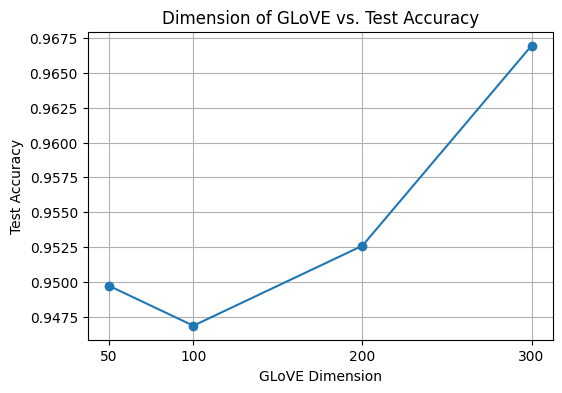


### We can see that as the dimension of the GLoVE embedding increases, the test accuracy (generally) increases. This is expected because with larger dimensions, the word vectors are able to capture more nuanced semantic and syntactic information, resulting in richer feature representations for each document. This typically boosts a model’s ability to distinguish between classes, thereby improving classification accuracy. The negligible dip in test accuracy from 50d to 100d is possibly due the fact that the 2x increase in dimension was not enough to enrich the features and improve the performance for the particular model under consideration.

Loading ../glove.6B/glove.6B.50d.txt ...
GloVe dimension=50, Test Accuracy=0.9497
Loading ../glove.6B/glove.6B.100d.txt ...
GloVe dimension=100, Test Accuracy=0.9468
Loading ../glove.6B/glove.6B.200d.txt ...


c:\Users\abhim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GloVe dimension=200, Test Accuracy=0.9526
Loading ../glove.6B/glove.6B.300d.txt ...
GloVe dimension=300, Test Accuracy=0.9670


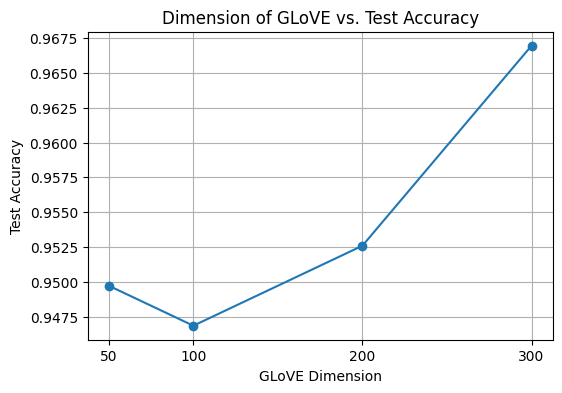

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

def doc_to_glove_vector(doc, glove_dict, normalize_word=True):
    tokens = doc.split()  
    vectors = []
    for token in tokens:
        if token in glove_dict:
            vec = glove_dict[token]
            if normalize_word:
                norm = np.linalg.norm(vec)
                if norm > 0:
                    vec = vec / norm
            vectors.append(vec)
    if not vectors:
        # If no recognized words, return a zero vector
        dim = len(next(iter(glove_dict.values())))  # dimension from GloVe
        return np.zeros(dim, dtype='float32')
    return np.mean(vectors, axis=0)

def build_features_from_glove(docs, glove_dict, normalize_word=True):
    X_embed = []
    for doc in docs:
        vec = doc_to_glove_vector(doc, glove_dict, normalize_word=normalize_word)
        X_embed.append(vec)
    return np.vstack(X_embed)


glove_paths = [
    ("../glove.6B/glove.6B.50d.txt", 50),
    ("../glove.6B/glove.6B.100d.txt", 100),
    ("../glove.6B/glove.6B.200d.txt", 200),
    ("../glove.6B/glove.6B.300d.txt", 300),
]


dimensions = []
accuracies = []

for glove_file, dim in glove_paths:
    # Load the GloVe dictionary
    print(f"Loading {glove_file} ...")
    glove_dict = load_glove_embeddings(glove_file)
    
    # Build features
    X_train_embed = build_features_from_glove(glove_train, glove_dict, normalize_word=True)
    X_test_embed = build_features_from_glove(glove_test, glove_dict, normalize_word=True)
    
    # Train a simple classifier
    clf = LogisticRegression(C=10000, penalty='l1', solver='liblinear', random_state=42)
    clf.fit(X_train_embed, y_train)
    
    # Evaluate on the test set
    y_pred = clf.predict(X_test_embed)
    test_acc = accuracy_score(y_test, y_pred)
    
    dimensions.append(dim)
    accuracies.append(test_acc)
    print(f"GloVe dimension={dim}, Test Accuracy={test_acc:.4f}")


plt.figure(figsize=(6,4))
plt.plot(dimensions, accuracies, marker='o')
plt.title("Dimension of GLoVE vs. Test Accuracy")
plt.xlabel("GLoVE Dimension")
plt.ylabel("Test Accuracy")
plt.xticks(dimensions)
plt.grid(True)
plt.show()


# Question 13


#  Compare and contrast the two visualizations. Are there clusters formed in either or both of the plots? We will pursue the clustering aspect further in the next project.



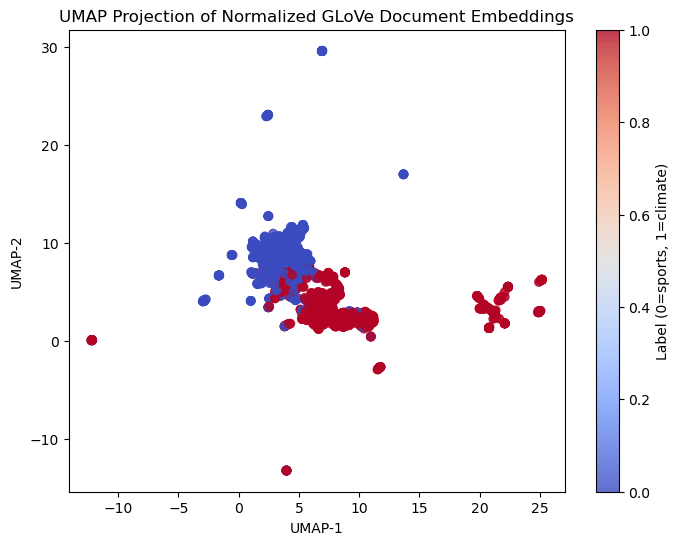



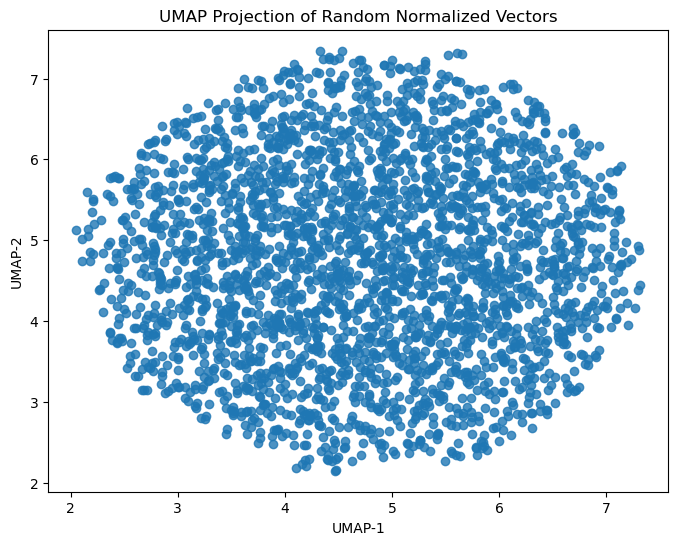



### The UMAP projections for the document GLoVE embeddings cluster into 2 distinct categories which can be given by our 'sports' and 'cimate' classes. Hence, our binary classification exercise has been validated.

### The random normalized vectors are all drawn from the same normal distribution and hence it makes sense that they are arranged in 1 big elliptical cluster. 

c:\Users\abhim\anaconda3\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abhim\anaconda3\envs\py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


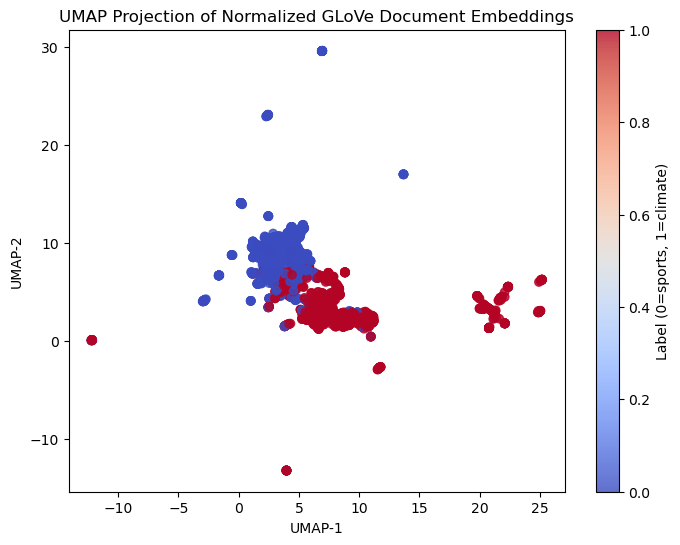

c:\Users\abhim\anaconda3\envs\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abhim\anaconda3\envs\py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\abhim\AppData\Local\Temp\ipykernel_25812\1579605627.py:150: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


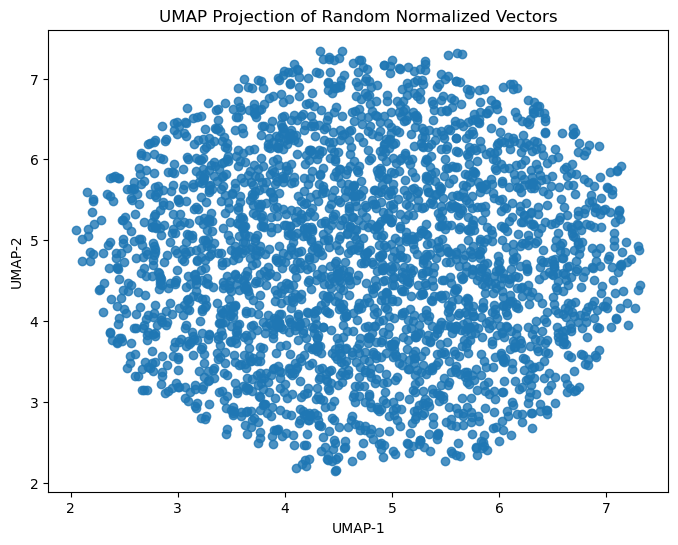

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os


def load_glove_embeddings(glove_path):
    
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


def doc_to_glove_vector(doc, glove_dict, normalize_word=True):
    
    tokens = doc.split()  # assuming doc already cleaned (punct, digits removed)
    vectors = []
    for token in tokens:
        if token in glove_dict:
            vec = glove_dict[token]
            if normalize_word:
                norm = np.linalg.norm(vec)
                if norm > 0:
                    vec = vec / norm
            vectors.append(vec)
    if not vectors:
        # If doc has no recognized words, return a zero vector
        dim = len(next(iter(glove_dict.values())))  # e.g., 300
        return np.zeros(dim, dtype='float32')
    return np.mean(vectors, axis=0)  # average across all word vectors

def build_features_from_glove(docs, glove_dict, normalize_word=True):
    
    X_embed = []
    for doc in docs:
        vec = doc_to_glove_vector(doc, glove_dict, normalize_word=normalize_word)
        X_embed.append(vec)
    return np.vstack(X_embed)



# Path to GloVe embeddings
glove_path = "../glove.6B/glove.6B.300d.txt"

# 3a) Load GloVe dictionary
glove_dict = load_glove_embeddings(glove_path)

# 3b) Build normalized GloVe vectors for train/test
X_train_glove = build_features_from_glove(glove_train, glove_dict, normalize_word=True)
X_test_glove  = build_features_from_glove(glove_test, glove_dict,  normalize_word=True)
label_mapping = {'sports': 0, 'climate': 1}  # Example label mapping
y_train = train['root_label'].map(label_mapping).values.tolist()




X_train_norm = X_train_glove / np.linalg.norm(X_train_glove, axis=1, keepdims=True)
# (Handle any zero rows by setting them to zero or skip dividing if norm=0)

umap_reducer_glove = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
X_train_glove_2d = umap_reducer_glove.fit_transform(X_train_norm)

# 5a) Plot the 2D points, color by label
plt.figure(figsize=(8,6))
plt.scatter(
    X_train_glove_2d[:,0],
    X_train_glove_2d[:,1],
    c=y_train,  # color by label
    cmap='coolwarm',
    alpha=0.8
)
plt.title("UMAP Projection of Normalized GLoVe Document Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label="Label (0=sports, 1=climate)")
plt.show()



n_docs, dim = X_train_glove.shape
X_rand = np.random.randn(n_docs, dim)
X_rand_norm = X_rand / np.linalg.norm(X_rand, axis=1, keepdims=True)

umap_reducer_rand = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
X_rand_2d = umap_reducer_rand.fit_transform(X_rand_norm)

# 6a) Plot the random vectors in 2D, color by same labels
plt.figure(figsize=(8,6))
plt.scatter(
    X_rand_2d[:,0],
    X_rand_2d[:,1],
    cmap='coolwarm',
    alpha=0.8
)
plt.title("UMAP Projection of Random Normalized Vectors")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.show()
